# В данном проекте анализирауется предсказаение оттока пользователей

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Первая часть. Исследование

## Загрузка данных

In [39]:
#Загружаем тренировочный датасет
train = pd.read_csv("train_dl.csv")

In [40]:
#Загружаем тестовый датасет
test = pd.read_csv("test_dl.csv")

In [41]:
#Взглянем на данные
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [42]:
#Проверка типов данных. TotalSpent - object, зотя должен быть float64, необходимо изменить
train.dtypes

ClientPeriod                  int64
MonthlySpending             float64
TotalSpent                   object
Sex                          object
IsSeniorCitizen               int64
HasPartner                   object
HasChild                     object
HasPhoneService              object
HasMultiplePhoneNumbers      object
HasInternetService           object
HasOnlineSecurityService     object
HasOnlineBackup              object
HasDeviceProtection          object
HasTechSupportAccess         object
HasOnlineTV                  object
HasMovieSubscription         object
HasContractPhone             object
IsBillingPaperless           object
PaymentMethod                object
Churn                         int64
dtype: object

In [43]:
num_cols = [
    "ClientPeriod",
    "MonthlySpending",
    "TotalSpent",
]

cat_cols = [
    "Sex",
    "IsSeniorCitizen",
    "HasPartner",
    "HasChild",
    "HasPhoneService",
    "HasMultiplePhoneNumbers",
    "HasInternetService",
    "HasOnlineSecurityService",
    "HasOnlineBackup",
    "HasDeviceProtection",
    "HasTechSupportAccess",
    "HasOnlineTV",
    "HasMovieSubscription",
    "HasContractPhone",
    "IsBillingPaperless",
    "PaymentMethod",
]

target = 'Churn'

In [44]:
#Проверяем количество пропущенных значений по каждой колонке в тренировочном датасете, везде показывает 0
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [45]:
#Проверяем количество пропущенных значений по каждой колонке в тестовом датасете, везде показывает 0
test.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [46]:
#Смотрим на количество дубликатов, всего выходит 28
train.duplicated(keep=False).sum()

28

In [47]:
#Посмотрим на количество дубликатов при удалении зависимой переменной
train.drop("Churn", axis = 1).duplicated(keep=False).sum()

41

In [48]:
#Уберём наблюдения дубликаты, чтобы убрать лишний шум
train = train[train.drop("Churn", axis = 1).duplicated(keep=False).replace({False : True, True:False})]

In [49]:
#Чисто выраженных пропущенных значений у нас нет, но может быть есть пустые ячейки, заменим их на NaN
train.replace(" ", np.nan, inplace=True)

In [50]:
#После замены в тренировочном датасете появилось 9 пропущенных значений в колонке TotalSpent
train.isna().sum()[train.isna().sum() > 0]

TotalSpent    9
dtype: int64

In [51]:
#Похоже, что пропущенные значения лишь у тех клиентов, кто не пользовался сервсимо,поэтому их затраты можно заменить на 0
train.sort_values("TotalSpent").tail(11)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3376,55,19.15,998.1,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
1157,11,94.20,999.9,Female,0,No,No,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,0
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0


In [52]:
train = train.fillna(0)

In [53]:
#Проверим всё ли заменилось
train.isna().sum()[train.isna().sum() > 0]

Series([], dtype: int64)

In [54]:
#Теперь проверим пропущенные значения в тестовом датасете, опять ни одного
test.isna().sum()[test.isna().sum() > 0]

Series([], dtype: int64)

In [55]:
#Проделаем аналогичную операцию с заменой и посмотрим. Появилось 2 пропущенные значения в той же самой колонке
test.replace(" ", np.nan, inplace=True)
test.isna().sum()[test.isna().sum() > 0]

TotalSpent    2
dtype: int64

In [56]:
#Аналогичная ситуация как и в тренировчном датасете, заменим пропущенные значения нулями
test.sort_values("TotalSpent").tail(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
1206,12,85.05,999.8,Male,0,Yes,No,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic)
177,0,19.85,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,NaN,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check


In [57]:
test = test.fillna(0)

In [58]:
#Теперь можно изменить тип TotalSpent на float64
train.TotalSpent = train.TotalSpent.astype('float64')
test.TotalSpent = test.TotalSpent.astype('float64')

## Анализ данных

<AxesSubplot: xlabel='Churn', ylabel='count'>

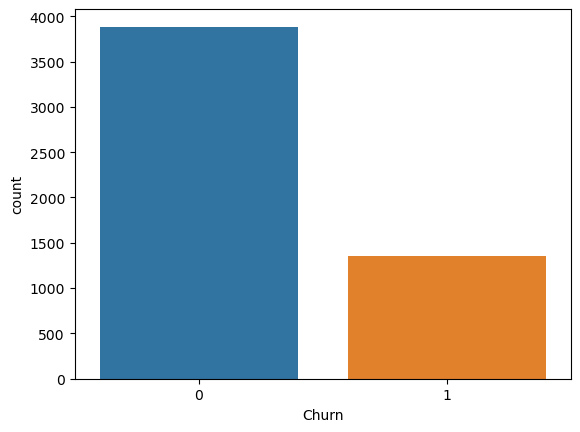

In [59]:
#Взглянем на распределение нашей целевой переменной
#Видно, что она несбалансированна 
sns.countplot(x = "Churn", data = train)

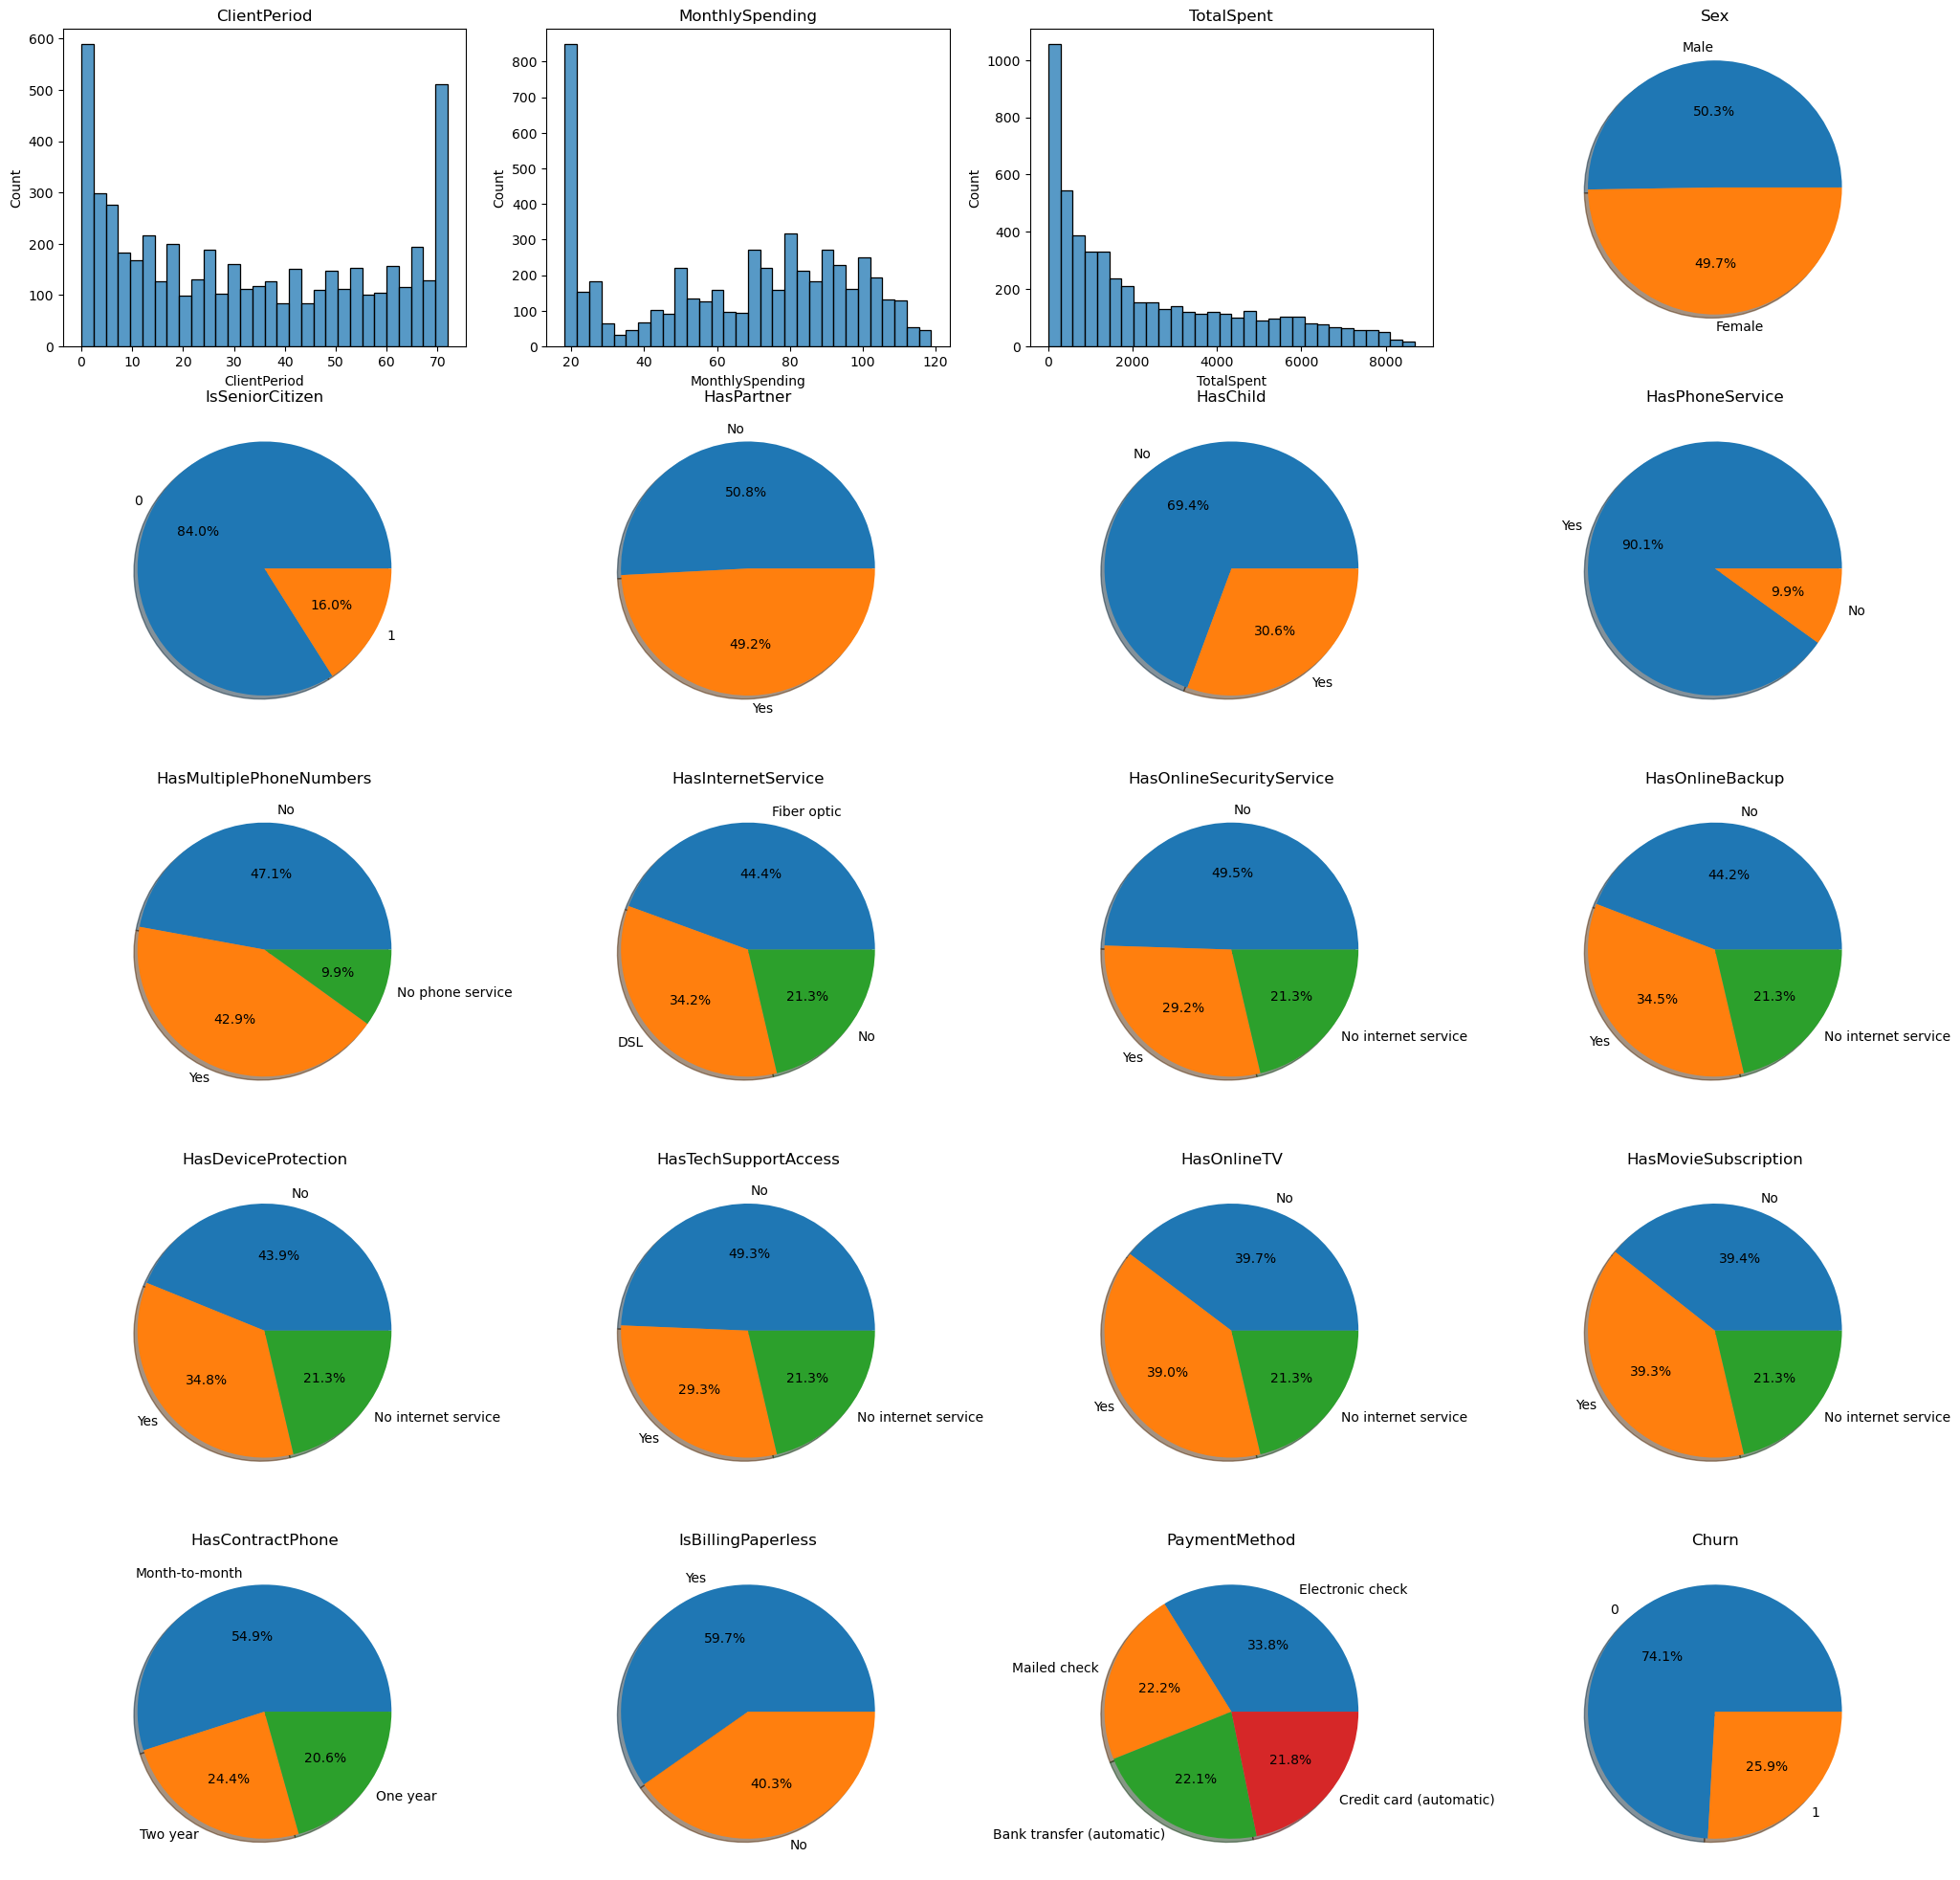

In [60]:
#Теперь посмтроим распределение каждого признака. Численные признаки не имеют нормального распределения
fig, axes = plt.subplots(5, 4, figsize=(25, 25))
for ax, col in zip(axes.flatten(), train.columns):
    ax.set_title(col)
    if col in cat_cols or col == target:
        ax.pie(train[col].value_counts(), shadow = True, autopct='%.1f%%', labels = train[col].value_counts().index)
    else:
        sns.histplot(x = train[col], ax = ax, bins = 30)
        

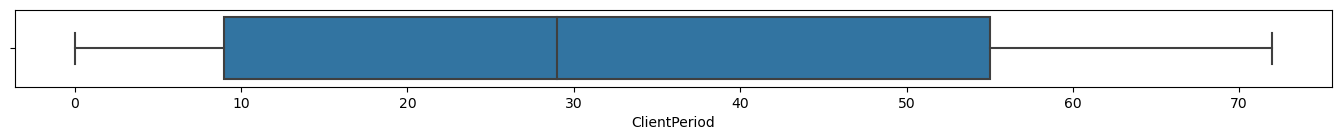

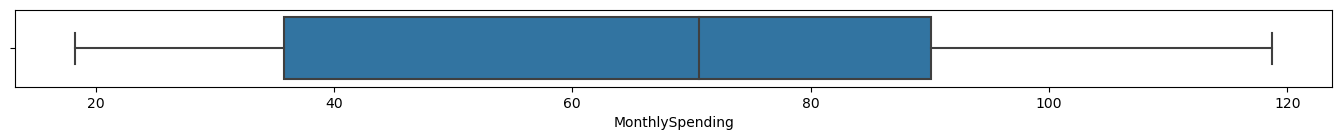

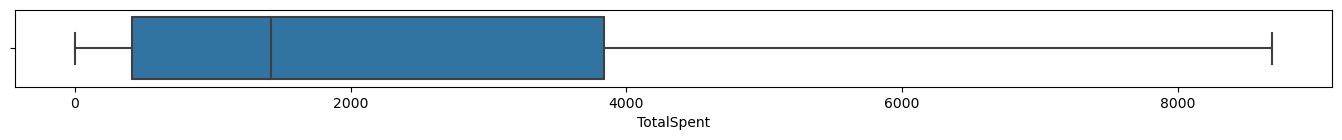

In [61]:
#посмотрим на выбросы, box-plot ничего не выявляют, хотя не стоит полагаться на них, потому что они примеными для нормального распределения
for col in num_cols:
    plt.figure(figsize = (17,1))
    sns.boxplot(x = col, data = train)
    

In [62]:
#Попробуем выявить выбросы с помощью Isolation Forest
from sklearn.ensemble import IsolationForest
df = train.copy()
df.drop(['Churn'], axis=1, inplace = True)

In [63]:
model=IsolationForest(n_estimators=300, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(df[num_cols])

C:\Users\paul\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=300)

In [64]:
scores=model.decision_function(df[num_cols])
anomaly=model.predict(df[num_cols])

df['scores']=scores
df['anomaly']=anomaly

df.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,scores,anomaly
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0.031153,1
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),-0.038237,-1
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,...,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,0.071985,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Month-to-month,No,Mailed check,0.076570,1
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),-0.042123,-1
5,25,19.80,475.20,Female,0,No,No,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0.064367,1
6,27,90.15,2423.40,Female,0,Yes,No,Yes,Yes,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0.064618,1
8,50,105.95,5341.80,Male,0,Yes,Yes,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),0.022715,1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),-0.022937,-1
10,16,78.75,1218.25,Male,1,No,No,Yes,No,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,0.074013,1


In [65]:
#Удалось обнаружить 523 выброса
df.anomaly.value_counts()

 1    4717
-1     524
Name: anomaly, dtype: int64

In [66]:
#Создадим копию тестового датасета без выбросов
train_wo_outl = train[df["anomaly"] == 1]
train_wo_outl.shape

(4717, 20)

In [67]:
#Теперь проверим выбрсоы с помощью DBSCAN
dfdb = train[num_cols].copy()

In [68]:
dfdb.shape

(5241, 3)

In [69]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(dfdb.values)

db = DBSCAN(eps=10.0, min_samples=500).fit(X)
labels = db.labels_

In [70]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('The number of clusters in dataset is:', n_clusters_)

The number of clusters in dataset is: 1


In [71]:
#DBSCAN наоборот утверждает, что выбросов в выборке нет, поэтому протестируем 2 типа данных
pd.Series(labels).value_counts()

0    5241
dtype: int64

In [72]:
#Для линейных моделей воспользуемся методом one-hot-encoding
train_ou_dum = pd.get_dummies(train)
train_wo_dum = pd.get_dummies(train_wo_outl)

## Применение линейныйх моделей

In [73]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split


In [84]:
#Делим наши данные без выбросов на признаки и целевую переменную
X = train_wo_dum.drop("Churn", axis = 1)
y = train_wo_dum.Churn

In [85]:
#Шкалируем их
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [86]:
#Делим наши данные с выбросами на признаки и целевую переменную
X_outl = train_ou_dum.drop("Churn", axis = 1)
y_outl = train_ou_dum.Churn
X_outl[num_cols] = scaler.transform(X_outl[num_cols])

In [87]:
#Разделение данных с выбросами на тренировочную и тестовую
X_train_ou, X_test_ou, y_train_ou, y_test_ou = train_test_split(
    X_outl, y_outl, test_size=0.25, random_state=17)

In [88]:
#Разделение данных без выбросов на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=17, stratify = y
)

In [89]:
from sklearn.metrics import roc_auc_score

In [90]:
#Задаём диапазон значений C
Cs = np.logspace(-3, 2, 30)
logcv = LogisticRegressionCV(Cs=Cs, scoring='roc_auc', refit = True)

In [91]:
logcv.fit(X_train_ou, y_train_ou)

LogisticRegressionCV(Cs=array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02]),
                     scoring='roc_auc')

In [92]:
#Лучшее значение C для выборки с выбросами
best_c_out = logcv.C_[0]
best_c_out

9.236708571873866

In [93]:
roc_auc_score(y_test_ou, logcv.predict_proba(X_test_ou)[:, 1])

0.8517225298049673

In [94]:
logcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02]),
                     scoring='roc_auc')

In [95]:
#Лучшее значение C для выборки без выбросов
best_c = logcv.C_[0]
best_c

2.8072162039411785

In [96]:
#Логистическая регрессия показала лучший результат на выборке без выбрсоов
roc_auc_score(y_test, logcv.predict_proba(X_test)[:, 1])

0.8571156095366621

In [149]:
test_log = test.copy()

In [150]:
test_log[num_cols] = scaler.fit_transform(test_log[num_cols])

In [152]:
test_log = pd.get_dummies(test_log)

In [156]:
my_submission = pd.DataFrame({"id": [i for i in range(0, len(test))],'Churn': logcv.predict_proba(pd.get_dummies(test_log))[:,1]})

my_submission.to_csv('mfti_cat.csv', index=False)

## Применение градиентного бустинга 

In [103]:
from catboost import CatBoostClassifier, Pool

In [104]:
#Делим наши данные с выбросами на признаки и целевую переменную, но уже не кодируя их
X_cat_ou = train.drop("Churn", axis = 1)
y_cat_ou = train.Churn

In [105]:
X_train_ou, X_test_ou, y_train_ou, y_test_ou = train_test_split(
   X_cat_ou, y_cat_ou, test_size=0.25, random_state=17)

In [106]:
#Делим наши данные без выбросов на признаки и целевую переменную, но уже не кодируя их
X_cat = train_wo_outl.drop("Churn", axis = 1)
y_cat = train_wo_outl.Churn

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X_cat, y_cat, test_size=0.25, random_state=17)

In [108]:
#Т.к. целевая переменная несбалансированна, то стоит расчитать веса для классов
from sklearn.utils.class_weight import compute_sample_weight
train_weights_ou = compute_sample_weight(class_weight='balanced', y = y_train_ou)
train_weights = compute_sample_weight(class_weight='balanced', y = y_train)
weigths = compute_sample_weight(class_weight='balanced', y = y)

In [112]:
train_data_ou = Pool(
    data= X_train_ou,
    label = y_train_ou,
    
    cat_features = cat_cols
)

In [113]:
valid_ou = Pool(
    data= X_test_ou,
    label = y_test_ou,
    cat_features = cat_cols
)

In [114]:
train_data = Pool(
    data= X_train,
    label = y_train,
    weight= train_weights,
    cat_features = cat_cols
)

In [115]:
valid = Pool(
    data= X_test,
    label = y_test,
    cat_features = cat_cols
)

In [142]:
#Запустим CatBoost на выборке с выбросами
clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.05, 
    loss_function='Logloss', eval_metric = 'AUC'
)


clf.fit(X = train_data_ou, 
        
        eval_set= valid_ou, 
        verbose=True, early_stopping_rounds=30)

0:	test: 0.8229594	best: 0.8229594 (0)	total: 24.8ms	remaining: 24.8s
1:	test: 0.8301655	best: 0.8301655 (1)	total: 50.2ms	remaining: 25.1s
2:	test: 0.8350802	best: 0.8350802 (2)	total: 72ms	remaining: 23.9s
3:	test: 0.8384418	best: 0.8384418 (3)	total: 93.3ms	remaining: 23.2s
4:	test: 0.8395106	best: 0.8395106 (4)	total: 115ms	remaining: 22.8s
5:	test: 0.8410546	best: 0.8410546 (5)	total: 136ms	remaining: 22.5s
6:	test: 0.8409859	best: 0.8410546 (5)	total: 156ms	remaining: 22.1s
7:	test: 0.8424148	best: 0.8424148 (7)	total: 178ms	remaining: 22.1s
8:	test: 0.8420725	best: 0.8424148 (7)	total: 200ms	remaining: 22s
9:	test: 0.8416181	best: 0.8424148 (7)	total: 218ms	remaining: 21.6s
10:	test: 0.8421547	best: 0.8424148 (7)	total: 240ms	remaining: 21.6s
11:	test: 0.8423491	best: 0.8424148 (7)	total: 265ms	remaining: 21.8s
12:	test: 0.8417885	best: 0.8424148 (7)	total: 288ms	remaining: 21.9s
13:	test: 0.8416929	best: 0.8424148 (7)	total: 307ms	remaining: 21.6s
14:	test: 0.8420725	best: 0.84

In [320]:
my_submission = pd.DataFrame({"id": [i for i in range(0, len(test))],'Churn': clf.predict_proba(test)[:,1]})

my_submission.to_csv('mfti_cat.csv', index=False)

In [143]:
#Запустим CatBoost на выборке без выбросов

clf.fit(X = train_data, 
        
        eval_set= valid, 
        verbose=True, early_stopping_rounds=30)

0:	test: 0.7629010	best: 0.7629010 (0)	total: 26.3ms	remaining: 26.2s
1:	test: 0.7882094	best: 0.7882094 (1)	total: 39.6ms	remaining: 19.8s
2:	test: 0.8209891	best: 0.8209891 (2)	total: 61.2ms	remaining: 20.3s
3:	test: 0.8251295	best: 0.8251295 (3)	total: 82ms	remaining: 20.4s
4:	test: 0.8250821	best: 0.8251295 (3)	total: 99.5ms	remaining: 19.8s
5:	test: 0.8298978	best: 0.8298978 (5)	total: 121ms	remaining: 20s
6:	test: 0.8282867	best: 0.8298978 (5)	total: 134ms	remaining: 19s
7:	test: 0.8281346	best: 0.8298978 (5)	total: 158ms	remaining: 19.6s
8:	test: 0.8274159	best: 0.8298978 (5)	total: 169ms	remaining: 18.7s
9:	test: 0.8285789	best: 0.8298978 (5)	total: 190ms	remaining: 18.9s
10:	test: 0.8310213	best: 0.8310213 (10)	total: 211ms	remaining: 18.9s
11:	test: 0.8311555	best: 0.8311555 (11)	total: 233ms	remaining: 19.2s
12:	test: 0.8322434	best: 0.8322434 (12)	total: 258ms	remaining: 19.6s
13:	test: 0.8325080	best: 0.8325080 (13)	total: 280ms	remaining: 19.7s
14:	test: 0.8325969	best: 0

In [322]:
my_submission = pd.DataFrame({"id": [i for i in range(0, len(test))],'Churn': clf.predict_proba(test)[:,1]})

my_submission.to_csv('mfti_cat.csv', index=False)

In [ ]:
# Показатель AUC получился больше на подвыборке с выбросами

In [117]:
#Теперь займёмся тюнингом гиперпараметров с помощью оптуны
import optuna

In [118]:
#Сначала выборка без выбросов
def objective(trial):
    param = {
          "loss_function": "Logloss",
          "eval_metric": "AUC",
          "task_type":"CPU",
          "devices":'0:1',
          "iterations": 5000,
          "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
          "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
          "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
          'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),
          "early_stopping_rounds":20,
          "max_depth" : trial.suggest_int('max_depth', 3, 10)
          
          
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)

    model = CatBoostClassifier(**param)
    model.fit(train_data, eval_set=valid, verbose=100, use_best_model=True, early_stopping_rounds=40)

    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    return roc

In [119]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-03-27 22:22:40,231] A new study created in memory with name: no-name-239882ba-34d0-4da5-b20b-d9b3480fdd90
C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


0:	test: 0.7612681	best: 0.7612681 (0)	total: 16.8ms	remaining: 1m 23s
100:	test: 0.8305237	best: 0.8305237 (100)	total: 1.49s	remaining: 1m 12s
200:	test: 0.8388065	best: 0.8388618 (198)	total: 2.94s	remaining: 1m 10s


[I 2023-03-27 22:22:44,520] Trial 0 finished with value: 0.8399121767837117 and parameters: {'learning_rate': 0.05831488495301591, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 1.5, 'max_depth': 4, 'bagging_temperature': 7.868460490857599}. Best is trial 0 with value: 0.8399121767837117.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8399121768
bestIteration = 247

Shrink model to first 248 iterations.
0:	test: 0.7620066	best: 0.7620066 (0)	total: 112ms	remaining: 9m 21s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8286243	best: 0.8287072 (99)	total: 18s	remaining: 14m 33s
200:	test: 0.8310193	best: 0.8312049 (167)	total: 40s	remaining: 15m 54s


[I 2023-03-27 22:23:26,062] Trial 1 finished with value: 0.8312048839817403 and parameters: {'learning_rate': 0.035634964250410336, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 5.0, 'max_depth': 10, 'bagging_temperature': 9.96177587621334}. Best is trial 0 with value: 0.8399121767837117.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.831204884
bestIteration = 167

Shrink model to first 168 iterations.
0:	test: 0.7768741	best: 0.7768741 (0)	total: 41.2ms	remaining: 3m 25s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8234730	best: 0.8235559 (97)	total: 4.16s	remaining: 3m 21s


[I 2023-03-27 22:23:32,477] Trial 2 finished with value: 0.8244917784201298 and parameters: {'learning_rate': 0.007133655848199122, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 8, 'bagging_temperature': 7.924364322683637}. Best is trial 0 with value: 0.8399121767837117.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8244917784
bestIteration = 116

Shrink model to first 117 iterations.
0:	test: 0.7708402	best: 0.7708402 (0)	total: 11.5ms	remaining: 57.4s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8437327	best: 0.8437564 (99)	total: 1.33s	remaining: 1m 4s
200:	test: 0.8461415	best: 0.8464614 (186)	total: 2.63s	remaining: 1m 2s


[I 2023-03-27 22:23:35,518] Trial 3 finished with value: 0.8464614035919065 and parameters: {'learning_rate': 0.08658726865115521, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.0, 'max_depth': 3, 'bagging_temperature': 1.9547299285040476}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8464614036
bestIteration = 186

Shrink model to first 187 iterations.
0:	test: 0.7864838	best: 0.7864838 (0)	total: 25ms	remaining: 2m 4s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8397562	best: 0.8400089 (84)	total: 3.86s	remaining: 3m 7s
200:	test: 0.8417287	best: 0.8417761 (196)	total: 6.85s	remaining: 2m 43s
300:	test: 0.8434524	best: 0.8435530 (282)	total: 10.9s	remaining: 2m 49s
400:	test: 0.8452254	best: 0.8452254 (400)	total: 18.9s	remaining: 3m 37s
500:	test: 0.8456914	best: 0.8461257 (475)	total: 27.4s	remaining: 4m 5s


[I 2023-03-27 22:24:04,164] Trial 4 finished with value: 0.8461257483138259 and parameters: {'learning_rate': 0.030932573298312206, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 1.5, 'max_depth': 8, 'bagging_temperature': 1.3768600754979732}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8461257483
bestIteration = 475

Shrink model to first 476 iterations.
0:	test: 0.8015349	best: 0.8015349 (0)	total: 38.4ms	remaining: 3m 12s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8438374	best: 0.8441770 (84)	total: 3.25s	remaining: 2m 37s


[I 2023-03-27 22:24:08,091] Trial 5 finished with value: 0.8441769732581466 and parameters: {'learning_rate': 0.07335724635282055, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 1.5, 'max_depth': 6, 'bagging_temperature': 1.2896549006824998}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8441769733
bestIteration = 84

Shrink model to first 85 iterations.
0:	test: 0.7613136	best: 0.7613136 (0)	total: 41.4ms	remaining: 3m 26s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8295661	best: 0.8296372 (98)	total: 4.76s	remaining: 3m 50s
200:	test: 0.8342218	best: 0.8348892 (192)	total: 9.5s	remaining: 3m 46s


[I 2023-03-27 22:24:20,205] Trial 6 finished with value: 0.8353670094299389 and parameters: {'learning_rate': 0.052169683880994154, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 5.0, 'max_depth': 7, 'bagging_temperature': 8.782027990613507}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8353670094
bestIteration = 213

Shrink model to first 214 iterations.
0:	test: 0.7166852	best: 0.7166852 (0)	total: 46.9ms	remaining: 3m 54s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8274495	best: 0.8274495 (100)	total: 5.16s	remaining: 4m 10s
200:	test: 0.8296332	best: 0.8299136 (190)	total: 9.91s	remaining: 3m 56s
300:	test: 0.8310390	best: 0.8310390 (300)	total: 14.8s	remaining: 3m 51s
400:	test: 0.8319354	best: 0.8321250 (374)	total: 19.9s	remaining: 3m 47s


[I 2023-03-27 22:24:42,493] Trial 7 finished with value: 0.8322631853291002 and parameters: {'learning_rate': 0.04143633330311254, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 2.0, 'max_depth': 7, 'bagging_temperature': 7.642260000432812}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8322631853
bestIteration = 411

Shrink model to first 412 iterations.
0:	test: 0.7864838	best: 0.7864838 (0)	total: 22.6ms	remaining: 1m 53s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),
[I 2023-03-27 22:24:44,709] Trial 8 finished with value: 0.8282254497780728 and parameters: {'learning_rate': 0.005598329810915852, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 5.0, 'max_depth': 4, 'bagging_temperature': 1.389323310917947}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8282254498
bestIteration = 44

Shrink model to first 45 iterations.
0:	test: 0.7200497	best: 0.7200497 (0)	total: 17.8ms	remaining: 1m 29s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8285552	best: 0.8292146 (90)	total: 2.26s	remaining: 1m 49s
200:	test: 0.8369189	best: 0.8369189 (200)	total: 4.36s	remaining: 1m 44s
300:	test: 0.8395884	best: 0.8395884 (300)	total: 6.36s	remaining: 1m 39s
400:	test: 0.8410356	best: 0.8410830 (390)	total: 8.62s	remaining: 1m 38s
500:	test: 0.8416418	best: 0.8417445 (488)	total: 11s	remaining: 1m 38s
600:	test: 0.8427396	best: 0.8427396 (600)	total: 13.1s	remaining: 1m 36s
700:	test: 0.8433477	best: 0.8433477 (700)	total: 15.2s	remaining: 1m 33s


[I 2023-03-27 22:25:02,203] Trial 9 finished with value: 0.8435254071301079 and parameters: {'learning_rate': 0.02562655801747844, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 4.5, 'max_depth': 3, 'bagging_temperature': 7.596347413950996}. Best is trial 3 with value: 0.8464614035919065.


800:	test: 0.8432608	best: 0.8435254 (765)	total: 17.3s	remaining: 1m 30s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8435254071
bestIteration = 765

Shrink model to first 766 iterations.
0:	test: 0.7783490	best: 0.7783490 (0)	total: 19.4ms	remaining: 1m 36s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8402755	best: 0.8406763 (76)	total: 2.2s	remaining: 1m 46s


[I 2023-03-27 22:25:05,838] Trial 10 finished with value: 0.8412547978960336 and parameters: {'learning_rate': 0.09714348989667161, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 5, 'bagging_temperature': 3.6893157266743053}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8412547979
bestIteration = 124

Shrink model to first 125 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 10.7ms	remaining: 53.3s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),
[I 2023-03-27 22:25:09,125] Trial 11 finished with value: 0.8361508632263975 and parameters: {'learning_rate': 0.09618206876281855, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.0, 'max_depth': 9, 'bagging_temperature': 0.1751014805431208}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8361508632
bestIteration = 32

Shrink model to first 33 iterations.
0:	test: 0.7944546	best: 0.7944546 (0)	total: 33.7ms	remaining: 2m 48s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),
[I 2023-03-27 22:25:12,903] Trial 12 finished with value: 0.8311811906679933 and parameters: {'learning_rate': 0.07383597258678302, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.0, 'max_depth': 8, 'bagging_temperature': 3.4533988804823847}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8311811907
bestIteration = 48

Shrink model to first 49 iterations.
0:	test: 0.7831766	best: 0.7831766 (0)	total: 25.5ms	remaining: 2m 7s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8368399	best: 0.8373118 (90)	total: 2.79s	remaining: 2m 15s
200:	test: 0.8382714	best: 0.8386387 (172)	total: 5.43s	remaining: 2m 9s


[I 2023-03-27 22:25:18,851] Trial 13 finished with value: 0.8386386611698178 and parameters: {'learning_rate': 0.027876857334528906, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 1.0, 'max_depth': 6, 'bagging_temperature': 2.9308056834390674}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8386386612
bestIteration = 172

Shrink model to first 173 iterations.


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


0:	test: 0.7735669	best: 0.7735669 (0)	total: 282ms	remaining: 23m 29s
100:	test: 0.8406783	best: 0.8411719 (78)	total: 20.8s	remaining: 16m 48s


[I 2023-03-27 22:25:48,734] Trial 14 finished with value: 0.8412666445529072 and parameters: {'learning_rate': 0.072845036638087, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.5, 'max_depth': 10, 'bagging_temperature': 4.676050026838405}. Best is trial 3 with value: 0.8464614035919065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8412666446
bestIteration = 104

Shrink model to first 105 iterations.
0:	test: 0.7708402	best: 0.7708402 (0)	total: 15.8ms	remaining: 1m 18s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8365773	best: 0.8367333 (98)	total: 1.41s	remaining: 1m 8s
200:	test: 0.8398826	best: 0.8399142 (198)	total: 2.67s	remaining: 1m 3s
300:	test: 0.8417326	best: 0.8417366 (299)	total: 4s	remaining: 1m 2s
400:	test: 0.8436755	best: 0.8436794 (399)	total: 6s	remaining: 1m 8s
500:	test: 0.8449233	best: 0.8450299 (494)	total: 7.72s	remaining: 1m 9s
600:	test: 0.8460922	best: 0.8460922 (600)	total: 9.51s	remaining: 1m 9s
700:	test: 0.8468069	best: 0.8468069 (700)	total: 11.2s	remaining: 1m 8s
800:	test: 0.8470913	best: 0.8472532 (776)	total: 13.1s	remaining: 1m 8s


[I 2023-03-27 22:26:02,435] Trial 15 finished with value: 0.8472531551596139 and parameters: {'learning_rate': 0.019321011144242884, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 2.0854342875768017}. Best is trial 15 with value: 0.8472531551596139.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8472531552
bestIteration = 776

Shrink model to first 777 iterations.
0:	test: 0.7209816	best: 0.7209816 (0)	total: 21.4ms	remaining: 1m 46s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8359850	best: 0.8361528 (82)	total: 2.46s	remaining: 1m 59s
200:	test: 0.8392409	best: 0.8393277 (199)	total: 4.38s	remaining: 1m 44s
300:	test: 0.8407474	best: 0.8407474 (300)	total: 6.23s	remaining: 1m 37s
400:	test: 0.8420189	best: 0.8421137 (393)	total: 7.69s	remaining: 1m 28s
500:	test: 0.8434997	best: 0.8435116 (499)	total: 9.09s	remaining: 1m 21s
600:	test: 0.8446291	best: 0.8446607 (597)	total: 10.4s	remaining: 1m 16s
700:	test: 0.8451780	best: 0.8451938 (693)	total: 11.7s	remaining: 1m 11s
800:	test: 0.8454544	best: 0.8455571 (793)	total: 13s	remaining: 1m 8s


[I 2023-03-27 22:26:16,013] Trial 16 finished with value: 0.8455571087839012 and parameters: {'learning_rate': 0.016663315707087546, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 5.3013511536433695}. Best is trial 15 with value: 0.8472531551596139.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8455571088
bestIteration = 793

Shrink model to first 794 iterations.
0:	test: 0.7852063	best: 0.7852063 (0)	total: 16.6ms	remaining: 1m 22s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8382339	best: 0.8382813 (99)	total: 1.67s	remaining: 1m 21s
200:	test: 0.8426586	best: 0.8427337 (199)	total: 3.28s	remaining: 1m 18s
300:	test: 0.8444791	best: 0.8444791 (300)	total: 5.03s	remaining: 1m 18s
400:	test: 0.8457605	best: 0.8460132 (378)	total: 6.71s	remaining: 1m 16s


[I 2023-03-27 22:26:23,129] Trial 17 finished with value: 0.8460132050735283 and parameters: {'learning_rate': 0.017971823138425727, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.0, 'max_depth': 4, 'bagging_temperature': 2.2166117907111325}. Best is trial 15 with value: 0.8472531551596139.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8460132051
bestIteration = 378

Shrink model to first 379 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.2ms	remaining: 56.2s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8443251	best: 0.8443251 (100)	total: 1.96s	remaining: 1m 34s
200:	test: 0.8463745	best: 0.8464930 (197)	total: 4.01s	remaining: 1m 35s


[I 2023-03-27 22:26:28,588] Trial 18 finished with value: 0.8468207521837336 and parameters: {'learning_rate': 0.04547344955496178, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 5, 'bagging_temperature': 0.5926767629006884}. Best is trial 15 with value: 0.8472531551596139.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8468207522
bestIteration = 226

Shrink model to first 227 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11ms	remaining: 55.1s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8447199	best: 0.8447476 (97)	total: 1.88s	remaining: 1m 31s


[I 2023-03-27 22:26:32,124] Trial 19 finished with value: 0.8464159914072249 and parameters: {'learning_rate': 0.045757439405488966, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 5, 'bagging_temperature': 0.18470613621756016}. Best is trial 15 with value: 0.8472531551596139.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8464159914
bestIteration = 137

Shrink model to first 138 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.7ms	remaining: 58.4s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8411482	best: 0.8412232 (98)	total: 2.11s	remaining: 1m 42s
200:	test: 0.8437742	best: 0.8437979 (199)	total: 4.12s	remaining: 1m 38s


[I 2023-03-27 22:26:38,584] Trial 20 finished with value: 0.844909491541487 and parameters: {'learning_rate': 0.03969752196930133, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 5, 'bagging_temperature': 0.2146878452691956}. Best is trial 15 with value: 0.8472531551596139.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8449094915
bestIteration = 256

Shrink model to first 257 iterations.
0:	test: 0.7740586	best: 0.7740586 (0)	total: 12.9ms	remaining: 1m 4s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8404137	best: 0.8404137 (100)	total: 1.33s	remaining: 1m 4s
200:	test: 0.8438492	best: 0.8439598 (197)	total: 2.63s	remaining: 1m 2s
300:	test: 0.8454939	best: 0.8454939 (300)	total: 3.96s	remaining: 1m 1s
400:	test: 0.8463094	best: 0.8463094 (400)	total: 5.22s	remaining: 59.9s
500:	test: 0.8462146	best: 0.8466687 (481)	total: 6.54s	remaining: 58.8s


[I 2023-03-27 22:26:45,536] Trial 21 finished with value: 0.8466687200871914 and parameters: {'learning_rate': 0.05333858991635148, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.0, 'max_depth': 3, 'bagging_temperature': 1.74587571582909}. Best is trial 15 with value: 0.8472531551596139.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8466687201
bestIteration = 481

Shrink model to first 482 iterations.
0:	test: 0.8013414	best: 0.8013414 (0)	total: 15.7ms	remaining: 1m 18s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8413377	best: 0.8413377 (100)	total: 2.3s	remaining: 1m 51s
200:	test: 0.8432371	best: 0.8432371 (200)	total: 4.81s	remaining: 1m 54s


[I 2023-03-27 22:26:52,682] Trial 22 finished with value: 0.8444988074365415 and parameters: {'learning_rate': 0.051365708429757816, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 2.5501953974645577}. Best is trial 15 with value: 0.8472531551596139.


300:	test: 0.8437090	best: 0.8444988 (267)	total: 6.92s	remaining: 1m 48s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8444988074
bestIteration = 267

Shrink model to first 268 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 12.9ms	remaining: 1m 4s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8418906	best: 0.8418906 (100)	total: 1.97s	remaining: 1m 35s
200:	test: 0.8443507	best: 0.8444929 (188)	total: 3.79s	remaining: 1m 30s


[I 2023-03-27 22:26:57,772] Trial 23 finished with value: 0.8445738362634064 and parameters: {'learning_rate': 0.05556675602619817, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 1.1245654137923946}. Best is trial 15 with value: 0.8472531551596139.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8445738363
bestIteration = 234

Shrink model to first 235 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 14.1ms	remaining: 1m 10s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8441197	best: 0.8441197 (100)	total: 2.13s	remaining: 1m 43s


[I 2023-03-27 22:27:02,373] Trial 24 finished with value: 0.8463350392519232 and parameters: {'learning_rate': 0.04642312455923414, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 5, 'bagging_temperature': 0.9005114344309597}. Best is trial 15 with value: 0.8472531551596139.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8463350393
bestIteration = 154

Shrink model to first 155 iterations.
0:	test: 0.7852063	best: 0.7852063 (0)	total: 20.5ms	remaining: 1m 42s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8437248	best: 0.8437248 (100)	total: 2.09s	remaining: 1m 41s
200:	test: 0.8463489	best: 0.8474091 (176)	total: 3.9s	remaining: 1m 33s


[I 2023-03-27 22:27:06,630] Trial 25 finished with value: 0.8474091361417808 and parameters: {'learning_rate': 0.06111095926631775, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.0, 'max_depth': 4, 'bagging_temperature': 2.2095109157283384}. Best is trial 25 with value: 0.8474091361417808.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8474091361
bestIteration = 176

Shrink model to first 177 iterations.
0:	test: 0.8029861	best: 0.8029861 (0)	total: 15.8ms	remaining: 1m 18s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8422223	best: 0.8428975 (85)	total: 1.73s	remaining: 1m 24s
200:	test: 0.8444297	best: 0.8444810 (198)	total: 3.51s	remaining: 1m 23s


[I 2023-03-27 22:27:11,574] Trial 26 finished with value: 0.8448206416149363 and parameters: {'learning_rate': 0.06238226438981943, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.0, 'max_depth': 4, 'bagging_temperature': 2.6846699055855217}. Best is trial 25 with value: 0.8474091361417808.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8448206416
bestIteration = 235

Shrink model to first 236 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 12.5ms	remaining: 1m 2s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8423862	best: 0.8423862 (100)	total: 2.59s	remaining: 2m 5s
200:	test: 0.8447081	best: 0.8448226 (198)	total: 5.27s	remaining: 2m 5s


[I 2023-03-27 22:27:18,543] Trial 27 finished with value: 0.84526489124769 and parameters: {'learning_rate': 0.03871189554288089, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.0, 'max_depth': 6, 'bagging_temperature': 0.6069328583713265}. Best is trial 25 with value: 0.8474091361417808.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8452648912
bestIteration = 219

Shrink model to first 220 iterations.
0:	test: 0.7876645	best: 0.7876645 (0)	total: 20.5ms	remaining: 1m 42s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8390316	best: 0.8390316 (100)	total: 2.35s	remaining: 1m 53s
200:	test: 0.8427751	best: 0.8427751 (200)	total: 4.93s	remaining: 1m 57s
300:	test: 0.8447555	best: 0.8448463 (284)	total: 7.34s	remaining: 1m 54s


[I 2023-03-27 22:27:27,883] Trial 28 finished with value: 0.8455057732707829 and parameters: {'learning_rate': 0.021967330924301278, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.5, 'max_depth': 5, 'bagging_temperature': 1.7433421390866877}. Best is trial 25 with value: 0.8474091361417808.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8455057733
bestIteration = 346

Shrink model to first 347 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.3ms	remaining: 56.4s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8454228	best: 0.8454268 (98)	total: 1.83s	remaining: 1m 28s
200:	test: 0.8466233	best: 0.8473183 (172)	total: 3.72s	remaining: 1m 28s


[I 2023-03-27 22:27:31,900] Trial 29 finished with value: 0.8473183117724177 and parameters: {'learning_rate': 0.06070927609393347, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 0.6614792415480593}. Best is trial 25 with value: 0.8474091361417808.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8473183118
bestIteration = 172

Shrink model to first 173 iterations.
0:	test: 0.7852063	best: 0.7852063 (0)	total: 16.2ms	remaining: 1m 21s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8431424	best: 0.8431424 (100)	total: 1.75s	remaining: 1m 24s
200:	test: 0.8481081	best: 0.8484595 (187)	total: 3.44s	remaining: 1m 22s


[I 2023-03-27 22:27:36,976] Trial 30 finished with value: 0.8489136615647065 and parameters: {'learning_rate': 0.0606136538495589, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 2.241688449983937}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8489136616
bestIteration = 254

Shrink model to first 255 iterations.
0:	test: 0.7852063	best: 0.7852063 (0)	total: 14.2ms	remaining: 1m 11s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8443251	best: 0.8443251 (100)	total: 1.68s	remaining: 1m 21s
200:	test: 0.8482937	best: 0.8482937 (200)	total: 3.34s	remaining: 1m 19s


[I 2023-03-27 22:27:41,156] Trial 31 finished with value: 0.8483963575478999 and parameters: {'learning_rate': 0.06453700864755225, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 2.164468325160004}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8483963575
bestIteration = 204

Shrink model to first 205 iterations.
0:	test: 0.7601151	best: 0.7601151 (0)	total: 14.6ms	remaining: 1m 12s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8442836	best: 0.8442836 (99)	total: 1.76s	remaining: 1m 25s
200:	test: 0.8461080	best: 0.8461080 (200)	total: 4.21s	remaining: 1m 40s


[I 2023-03-27 22:27:46,592] Trial 32 finished with value: 0.8465028668909633 and parameters: {'learning_rate': 0.06181013078939572, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 3.0336856547967166}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8465028669
bestIteration = 217

Shrink model to first 218 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 14.2ms	remaining: 1m 10s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8448542	best: 0.8448542 (100)	total: 1.97s	remaining: 1m 35s
200:	test: 0.8459480	best: 0.8459757 (179)	total: 3.87s	remaining: 1m 32s
300:	test: 0.8469116	best: 0.8475118 (277)	total: 5.69s	remaining: 1m 28s


[I 2023-03-27 22:27:52,827] Trial 33 finished with value: 0.8475118071680172 and parameters: {'learning_rate': 0.06425379878392781, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.5, 'max_depth': 4, 'bagging_temperature': 1.0001921853085944}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8475118072
bestIteration = 277

Shrink model to first 278 iterations.
0:	test: 0.7852063	best: 0.7852063 (0)	total: 19.8ms	remaining: 1m 39s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8425757	best: 0.8425757 (100)	total: 2.03s	remaining: 1m 38s


[I 2023-03-27 22:27:56,268] Trial 34 finished with value: 0.8435885893000995 and parameters: {'learning_rate': 0.06966012943746502, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.5, 'max_depth': 4, 'bagging_temperature': 2.2256357123647628}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8435885893
bestIteration = 133

Shrink model to first 134 iterations.
0:	test: 0.7811370	best: 0.7811370 (0)	total: 14.6ms	remaining: 1m 12s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8437722	best: 0.8437762 (97)	total: 1.68s	remaining: 1m 21s
200:	test: 0.8457012	best: 0.8457289 (192)	total: 3.66s	remaining: 1m 27s


[I 2023-03-27 22:28:01,782] Trial 35 finished with value: 0.8466706945300037 and parameters: {'learning_rate': 0.05841387128506861, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.0, 'max_depth': 4, 'bagging_temperature': 1.5829326197522637}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8466706945
bestIteration = 235

Shrink model to first 236 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 16.2ms	remaining: 1m 21s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8402202	best: 0.8406032 (91)	total: 3.3s	remaining: 2m 40s


[I 2023-03-27 22:28:06,983] Trial 36 finished with value: 0.8407315705507906 and parameters: {'learning_rate': 0.06593464118519117, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.5, 'max_depth': 6, 'bagging_temperature': 1.2217751957102787}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8407315706
bestIteration = 122

Shrink model to first 123 iterations.
0:	test: 0.7442228	best: 0.7442228 (0)	total: 12.6ms	remaining: 1m 2s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8422479	best: 0.8422479 (100)	total: 1.7s	remaining: 1m 22s
200:	test: 0.8455848	best: 0.8458770 (191)	total: 3.14s	remaining: 1m 14s


[I 2023-03-27 22:28:10,632] Trial 37 finished with value: 0.8458769685194838 and parameters: {'learning_rate': 0.0796593527840948, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.0, 'max_depth': 3, 'bagging_temperature': 3.66377009363063}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8458769685
bestIteration = 191

Shrink model to first 192 iterations.
0:	test: 0.7919589	best: 0.7919589 (0)	total: 18.7ms	remaining: 1m 33s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8433043	best: 0.8433931 (96)	total: 2.19s	remaining: 1m 46s


[I 2023-03-27 22:28:14,130] Trial 38 finished with value: 0.843667567012589 and parameters: {'learning_rate': 0.06647135988465146, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 5.0, 'max_depth': 5, 'bagging_temperature': 1.9977660833817987}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.843667567
bestIteration = 103

Shrink model to first 104 iterations.
0:	test: 0.7841006	best: 0.7841006 (0)	total: 28.9ms	remaining: 2m 24s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8398687	best: 0.8398687 (100)	total: 2.52s	remaining: 2m 2s
200:	test: 0.8444554	best: 0.8444554 (200)	total: 4.52s	remaining: 1m 47s
300:	test: 0.8459421	best: 0.8459935 (296)	total: 6.53s	remaining: 1m 41s


[I 2023-03-27 22:28:21,635] Trial 39 finished with value: 0.8460171539591528 and parameters: {'learning_rate': 0.05672655861815392, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 4.5, 'max_depth': 3, 'bagging_temperature': 1.0888996433471299}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.846017154
bestIteration = 301

Shrink model to first 302 iterations.
0:	test: 0.8222370	best: 0.8222370 (0)	total: 29.5ms	remaining: 2m 27s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),
[I 2023-03-27 22:28:24,801] Trial 40 finished with value: 0.837199292359696 and parameters: {'learning_rate': 0.07944992115532935, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.0, 'max_depth': 7, 'bagging_temperature': 2.5213549111149525}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8371992924
bestIteration = 50

Shrink model to first 51 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.1ms	remaining: 55.5s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8433339	best: 0.8436064 (93)	total: 1.68s	remaining: 1m 21s


[I 2023-03-27 22:28:28,142] Trial 41 finished with value: 0.8472492062739895 and parameters: {'learning_rate': 0.0605487472235637, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 0.6314766379618673}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8472492063
bestIteration = 147

Shrink model to first 148 iterations.
0:	test: 0.7811370	best: 0.7811370 (0)	total: 18.2ms	remaining: 1m 31s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8420327	best: 0.8426330 (87)	total: 2.08s	remaining: 1m 40s


[I 2023-03-27 22:28:31,812] Trial 42 finished with value: 0.8449845203683521 and parameters: {'learning_rate': 0.0645942267123455, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 1.5363086494004285}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8449845204
bestIteration = 148

Shrink model to first 149 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 10.9ms	remaining: 54.3s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8448345	best: 0.8453794 (90)	total: 1.67s	remaining: 1m 21s
200:	test: 0.8461119	best: 0.8468267 (173)	total: 3.29s	remaining: 1m 18s


[I 2023-03-27 22:28:36,071] Trial 43 finished with value: 0.846846419940293 and parameters: {'learning_rate': 0.05800075581436968, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 0.003331384053175568}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8468464199
bestIteration = 209

Shrink model to first 210 iterations.
0:	test: 0.7841006	best: 0.7841006 (0)	total: 15.4ms	remaining: 1m 17s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8426981	best: 0.8427692 (99)	total: 2.53s	remaining: 2m 2s
200:	test: 0.8446311	best: 0.8447950 (186)	total: 5.41s	remaining: 2m 9s
300:	test: 0.8459204	best: 0.8461909 (277)	total: 9.02s	remaining: 2m 20s


[I 2023-03-27 22:28:45,763] Trial 44 finished with value: 0.8461909049266297 and parameters: {'learning_rate': 0.06844163021795176, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.0, 'max_depth': 5, 'bagging_temperature': 0.7083133468701637}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8461909049
bestIteration = 277

Shrink model to first 278 iterations.
0:	test: 0.7811370	best: 0.7811370 (0)	total: 15.4ms	remaining: 1m 17s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8408402	best: 0.8408797 (97)	total: 1.73s	remaining: 1m 23s
200:	test: 0.8445363	best: 0.8446508 (197)	total: 3.5s	remaining: 1m 23s
300:	test: 0.8461850	best: 0.8462679 (297)	total: 5.62s	remaining: 1m 27s


[I 2023-03-27 22:28:53,018] Trial 45 finished with value: 0.8467022856149995 and parameters: {'learning_rate': 0.05075302976750054, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.0, 'max_depth': 4, 'bagging_temperature': 1.4543153547585799}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8467022856
bestIteration = 327

Shrink model to first 328 iterations.
0:	test: 0.7973886	best: 0.7973886 (0)	total: 28ms	remaining: 2m 19s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8420762	best: 0.8427396 (93)	total: 3.04s	remaining: 2m 27s


[I 2023-03-27 22:28:57,058] Trial 46 finished with value: 0.842739578890837 and parameters: {'learning_rate': 0.06151338607122783, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 6, 'bagging_temperature': 1.817653106252568}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8427395789
bestIteration = 93

Shrink model to first 94 iterations.
0:	test: 0.7841006	best: 0.7841006 (0)	total: 15.7ms	remaining: 1m 18s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8412133	best: 0.8412133 (100)	total: 2.41s	remaining: 1m 56s
200:	test: 0.8448226	best: 0.8448226 (200)	total: 5.95s	remaining: 2m 22s
300:	test: 0.8474289	best: 0.8474289 (300)	total: 8.36s	remaining: 2m 10s


[I 2023-03-27 22:29:07,528] Trial 47 finished with value: 0.8476875325783064 and parameters: {'learning_rate': 0.05537148312203969, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.0, 'max_depth': 3, 'bagging_temperature': 1.0949047249292498}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8476875326
bestIteration = 350

Shrink model to first 351 iterations.
0:	test: 0.7280185	best: 0.7280185 (0)	total: 19ms	remaining: 1m 35s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8391421	best: 0.8391737 (99)	total: 2.17s	remaining: 1m 45s
200:	test: 0.8437110	best: 0.8437110 (199)	total: 4.42s	remaining: 1m 45s
300:	test: 0.8450892	best: 0.8451010 (299)	total: 6.75s	remaining: 1m 45s
400:	test: 0.8460053	best: 0.8460369 (383)	total: 8.99s	remaining: 1m 43s


[I 2023-03-27 22:29:17,125] Trial 48 finished with value: 0.8460368983872751 and parameters: {'learning_rate': 0.07004119265391259, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.0, 'max_depth': 3, 'bagging_temperature': 3.2253590616116083}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8460368984
bestIteration = 383

Shrink model to first 384 iterations.
0:	test: 0.7939985	best: 0.7939985 (0)	total: 63.3ms	remaining: 5m 16s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8434583	best: 0.8440861 (77)	total: 7.62s	remaining: 6m 9s
200:	test: 0.8449529	best: 0.8454189 (166)	total: 14.6s	remaining: 5m 49s


[I 2023-03-27 22:29:32,463] Trial 49 finished with value: 0.8454188977870445 and parameters: {'learning_rate': 0.054353748969541246, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 4.5, 'max_depth': 9, 'bagging_temperature': 2.2840548503735008}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8454188978
bestIteration = 166

Shrink model to first 167 iterations.
0:	test: 0.7494531	best: 0.7494531 (0)	total: 19ms	remaining: 1m 35s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8410179	best: 0.8412311 (92)	total: 2.76s	remaining: 2m 13s
200:	test: 0.8434721	best: 0.8434721 (200)	total: 5.27s	remaining: 2m 5s
300:	test: 0.8446785	best: 0.8446785 (300)	total: 7.7s	remaining: 2m
400:	test: 0.8455867	best: 0.8457131 (375)	total: 11.1s	remaining: 2m 6s


[I 2023-03-27 22:29:45,339] Trial 50 finished with value: 0.846044796158524 and parameters: {'learning_rate': 0.0494595419500439, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 5.0, 'max_depth': 3, 'bagging_temperature': 2.7825657702566815}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8460447962
bestIteration = 410

Shrink model to first 411 iterations.
0:	test: 0.7478498	best: 0.7478498 (0)	total: 25.7ms	remaining: 2m 8s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8417306	best: 0.8417306 (100)	total: 3.25s	remaining: 2m 37s
200:	test: 0.8452629	best: 0.8452629 (200)	total: 5.9s	remaining: 2m 20s
300:	test: 0.8475908	best: 0.8476184 (298)	total: 9.22s	remaining: 2m 23s


[I 2023-03-27 22:29:57,100] Trial 51 finished with value: 0.8479481590295218 and parameters: {'learning_rate': 0.058370176282669405, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.0, 'max_depth': 4, 'bagging_temperature': 1.10857896047873}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.847948159
bestIteration = 348

Shrink model to first 349 iterations.
0:	test: 0.7740586	best: 0.7740586 (0)	total: 17.2ms	remaining: 1m 26s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8421157	best: 0.8421393 (99)	total: 2.11s	remaining: 1m 42s
200:	test: 0.8463528	best: 0.8463647 (196)	total: 4.25s	remaining: 1m 41s


[I 2023-03-27 22:30:02,508] Trial 52 finished with value: 0.8465068157765878 and parameters: {'learning_rate': 0.06468635832278631, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.0, 'max_depth': 3, 'bagging_temperature': 1.4311209793518014}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8465068158
bestIteration = 208

Shrink model to first 209 iterations.
0:	test: 0.7841006	best: 0.7841006 (0)	total: 17.1ms	remaining: 1m 25s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8417287	best: 0.8417287 (100)	total: 2.63s	remaining: 2m 7s
200:	test: 0.8432391	best: 0.8432391 (200)	total: 5.75s	remaining: 2m 17s


[I 2023-03-27 22:30:12,268] Trial 53 finished with value: 0.8442658231846973 and parameters: {'learning_rate': 0.05510488480981222, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.0, 'max_depth': 4, 'bagging_temperature': 1.0675465325702898}. Best is trial 30 with value: 0.8489136615647065.


300:	test: 0.8438137	best: 0.8442658 (261)	total: 9.62s	remaining: 2m 30s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8442658232
bestIteration = 261

Shrink model to first 262 iterations.
0:	test: 0.7851095	best: 0.7851095 (0)	total: 41.3ms	remaining: 3m 26s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8395963	best: 0.8396318 (98)	total: 4.92s	remaining: 3m 58s
200:	test: 0.8424237	best: 0.8424237 (200)	total: 8.59s	remaining: 3m 25s
300:	test: 0.8430081	best: 0.8430397 (297)	total: 13.1s	remaining: 3m 24s


[I 2023-03-27 22:30:27,686] Trial 54 finished with value: 0.8439953245194206 and parameters: {'learning_rate': 0.05806797838589432, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 2.0, 'max_depth': 5, 'bagging_temperature': 2.133052627254205}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8439953245
bestIteration = 321

Shrink model to first 322 iterations.
0:	test: 0.7740586	best: 0.7740586 (0)	total: 17.4ms	remaining: 1m 26s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8401017	best: 0.8403308 (95)	total: 2.1s	remaining: 1m 41s
200:	test: 0.8416043	best: 0.8420110 (171)	total: 4.13s	remaining: 1m 38s


[I 2023-03-27 22:30:33,644] Trial 55 finished with value: 0.8429567676001832 and parameters: {'learning_rate': 0.07498055048457011, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.5, 'max_depth': 3, 'bagging_temperature': 1.8192230946657237}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8429567676
bestIteration = 242

Shrink model to first 243 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 17.8ms	remaining: 1m 28s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8424019	best: 0.8424019 (96)	total: 2.5s	remaining: 2m 1s
200:	test: 0.8449095	best: 0.8450201 (199)	total: 4.85s	remaining: 1m 55s
300:	test: 0.8458750	best: 0.8459757 (287)	total: 7.44s	remaining: 1m 56s


[I 2023-03-27 22:30:41,869] Trial 56 finished with value: 0.8459756906600957 and parameters: {'learning_rate': 0.06367982848951297, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.0, 'max_depth': 4, 'bagging_temperature': 0.3509126777084772}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8459756907
bestIteration = 287

Shrink model to first 288 iterations.
0:	test: 0.7841006	best: 0.7841006 (0)	total: 17.4ms	remaining: 1m 27s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8385715	best: 0.8385715 (100)	total: 2.04s	remaining: 1m 39s
200:	test: 0.8427040	best: 0.8427159 (197)	total: 4.21s	remaining: 1m 40s
300:	test: 0.8443527	best: 0.8445067 (292)	total: 6.33s	remaining: 1m 38s
400:	test: 0.8452076	best: 0.8454406 (385)	total: 8.41s	remaining: 1m 36s


[I 2023-03-27 22:30:50,925] Trial 57 finished with value: 0.8454406166579791 and parameters: {'learning_rate': 0.04945027695005229, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 4.0, 'max_depth': 3, 'bagging_temperature': 1.0919000302287858}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8454406167
bestIteration = 385

Shrink model to first 386 iterations.
0:	test: 0.7796068	best: 0.7796068 (0)	total: 28.6ms	remaining: 2m 23s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8441414	best: 0.8446824 (85)	total: 3.43s	remaining: 2m 46s


[I 2023-03-27 22:30:56,714] Trial 58 finished with value: 0.8449035682130502 and parameters: {'learning_rate': 0.06795006910248826, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 1.0, 'max_depth': 5, 'bagging_temperature': 2.5010303360788475}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8449035682
bestIteration = 129

Shrink model to first 130 iterations.
0:	test: 0.7539686	best: 0.7539686 (0)	total: 22.7ms	remaining: 1m 53s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),
[I 2023-03-27 22:30:59,646] Trial 59 finished with value: 0.842788939961143 and parameters: {'learning_rate': 0.05540755900856251, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.0, 'max_depth': 4, 'bagging_temperature': 4.040562114101328}. Best is trial 30 with value: 0.8489136615647065.


100:	test: 0.8421551	best: 0.8427889 (61)	total: 2.83s	remaining: 2m 17s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.84278894
bestIteration = 61

Shrink model to first 62 iterations.
0:	test: 0.7841006	best: 0.7841006 (0)	total: 20.2ms	remaining: 1m 41s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8387670	best: 0.8387670 (100)	total: 2.56s	remaining: 2m 4s
200:	test: 0.8418471	best: 0.8419538 (198)	total: 5.11s	remaining: 2m 2s
300:	test: 0.8442895	best: 0.8442895 (300)	total: 8.38s	remaining: 2m 10s
400:	test: 0.8453320	best: 0.8453320 (398)	total: 11s	remaining: 2m 5s


[I 2023-03-27 22:31:11,995] Trial 60 finished with value: 0.8453320223033061 and parameters: {'learning_rate': 0.0432512213450161, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 0.9140585623904826}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8453320223
bestIteration = 398

Shrink model to first 399 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 23.7ms	remaining: 1m 58s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8417306	best: 0.8420544 (84)	total: 2.3s	remaining: 1m 51s


[I 2023-03-27 22:31:16,238] Trial 61 finished with value: 0.844927261526797 and parameters: {'learning_rate': 0.0612119768462717, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 0.610419497219148}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8449272615
bestIteration = 151

Shrink model to first 152 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.3ms	remaining: 56.6s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8444712	best: 0.8444712 (100)	total: 1.82s	remaining: 1m 28s
200:	test: 0.8470932	best: 0.8477487 (171)	total: 3.75s	remaining: 1m 29s


[I 2023-03-27 22:31:20,333] Trial 62 finished with value: 0.8477487403054857 and parameters: {'learning_rate': 0.0597693593056723, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 0.3448469708220734}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8477487403
bestIteration = 171

Shrink model to first 172 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 16.6ms	remaining: 1m 22s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8422598	best: 0.8422598 (99)	total: 2.55s	remaining: 2m 3s
200:	test: 0.8451405	best: 0.8451405 (200)	total: 4.98s	remaining: 1m 58s
300:	test: 0.8457881	best: 0.8466727 (273)	total: 7.16s	remaining: 1m 51s


[I 2023-03-27 22:31:27,882] Trial 63 finished with value: 0.8466726689728158 and parameters: {'learning_rate': 0.05123752556587757, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.0, 'max_depth': 5, 'bagging_temperature': 0.27900188392360814}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.846672669
bestIteration = 273

Shrink model to first 274 iterations.
0:	test: 0.7811370	best: 0.7811370 (0)	total: 14.2ms	remaining: 1m 10s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8427751	best: 0.8435294 (94)	total: 1.79s	remaining: 1m 27s
200:	test: 0.8440704	best: 0.8446706 (179)	total: 3.6s	remaining: 1m 26s


[I 2023-03-27 22:31:31,951] Trial 64 finished with value: 0.8446705839612061 and parameters: {'learning_rate': 0.05873257134559121, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 1.4138345814722555}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.844670584
bestIteration = 179

Shrink model to first 180 iterations.
0:	test: 0.7919589	best: 0.7919589 (0)	total: 23.2ms	remaining: 1m 55s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8429884	best: 0.8432332 (97)	total: 2.25s	remaining: 1m 49s
200:	test: 0.8446350	best: 0.8455314 (174)	total: 4.64s	remaining: 1m 50s


[I 2023-03-27 22:31:37,024] Trial 65 finished with value: 0.845531441027342 and parameters: {'learning_rate': 0.05393186497832164, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.0, 'max_depth': 5, 'bagging_temperature': 1.9120086561299598}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.845531441
bestIteration = 174

Shrink model to first 175 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 12.9ms	remaining: 1m 4s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8437525	best: 0.8439341 (94)	total: 2s	remaining: 1m 36s
200:	test: 0.8480864	best: 0.8481890 (198)	total: 4.31s	remaining: 1m 42s


[I 2023-03-27 22:31:43,044] Trial 66 finished with value: 0.8485641851869403 and parameters: {'learning_rate': 0.06323345036443752, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 4, 'bagging_temperature': 0.3629704795386276}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8485641852
bestIteration = 234

Shrink model to first 235 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 12.9ms	remaining: 1m 4s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8447891	best: 0.8447891 (100)	total: 1.57s	remaining: 1m 16s
200:	test: 0.8474842	best: 0.8474921 (194)	total: 3.32s	remaining: 1m 19s


[I 2023-03-27 22:31:47,378] Trial 67 finished with value: 0.8475828871092578 and parameters: {'learning_rate': 0.07127784668338975, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.0, 'max_depth': 3, 'bagging_temperature': 0.29596206936382063}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8475828871
bestIteration = 204

Shrink model to first 205 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 12.4ms	remaining: 1m 2s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8458118	best: 0.8458118 (100)	total: 1.5s	remaining: 1m 12s


[I 2023-03-27 22:31:50,537] Trial 68 finished with value: 0.8484536163894549 and parameters: {'learning_rate': 0.07270081209859568, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.0, 'max_depth': 3, 'bagging_temperature': 0.3853049930881117}. Best is trial 30 with value: 0.8489136615647065.


200:	test: 0.8477448	best: 0.8484536 (166)	total: 2.97s	remaining: 1m 10s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8484536164
bestIteration = 166

Shrink model to first 167 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 13.3ms	remaining: 1m 6s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8422124	best: 0.8422124 (100)	total: 1.42s	remaining: 1m 8s
200:	test: 0.8460705	best: 0.8461139 (196)	total: 2.81s	remaining: 1m 7s


[I 2023-03-27 22:31:54,321] Trial 69 finished with value: 0.8469688353946516 and parameters: {'learning_rate': 0.0662488067019005, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 0.8434043774846101}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8469688354
bestIteration = 222

Shrink model to first 223 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 12ms	remaining: 1m


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8455275	best: 0.8457170 (98)	total: 1.41s	remaining: 1m 8s


[I 2023-03-27 22:31:57,479] Trial 70 finished with value: 0.8481515266391824 and parameters: {'learning_rate': 0.07204987151629165, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 0.4388925647412595}. Best is trial 30 with value: 0.8489136615647065.


200:	test: 0.8480212	best: 0.8481515 (168)	total: 2.93s	remaining: 1m 9s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8481515266
bestIteration = 168

Shrink model to first 169 iterations.


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


0:	test: 0.7629010	best: 0.7629010 (0)	total: 13.9ms	remaining: 1m 9s
100:	test: 0.8455196	best: 0.8455196 (100)	total: 1.67s	remaining: 1m 21s
200:	test: 0.8482048	best: 0.8483509 (198)	total: 3.36s	remaining: 1m 20s


[I 2023-03-27 22:32:01,691] Trial 71 finished with value: 0.8484417697325815 and parameters: {'learning_rate': 0.07331960148652958, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 0.04812258418520843}. Best is trial 30 with value: 0.8489136615647065.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8484417697
bestIteration = 204

Shrink model to first 205 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 14.9ms	remaining: 1m 14s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8455591	best: 0.8455591 (100)	total: 1.74s	remaining: 1m 24s
200:	test: 0.8485405	best: 0.8487004 (187)	total: 3.58s	remaining: 1m 25s


[I 2023-03-27 22:32:06,117] Trial 72 finished with value: 0.8492039046581055 and parameters: {'learning_rate': 0.07511902981350263, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 0.08761535607282256}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8492039047
bestIteration = 206

Shrink model to first 207 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.6ms	remaining: 57.9s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8445245	best: 0.8445245 (100)	total: 1.41s	remaining: 1m 8s


[I 2023-03-27 22:32:08,970] Trial 73 finished with value: 0.8480883444691909 and parameters: {'learning_rate': 0.07236218812937092, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 0.05791573925690341}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8480883445
bestIteration = 159

Shrink model to first 160 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.4ms	remaining: 57s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8447180	best: 0.8447180 (100)	total: 1.32s	remaining: 1m 4s
200:	test: 0.8473104	best: 0.8480133 (187)	total: 2.8s	remaining: 1m 6s


[I 2023-03-27 22:32:12,266] Trial 74 finished with value: 0.8480133156423257 and parameters: {'learning_rate': 0.0746095622470954, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 0.045208619148712846}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8480133156
bestIteration = 187

Shrink model to first 188 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.1ms	remaining: 55.6s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8426705	best: 0.8426705 (100)	total: 1.44s	remaining: 1m 9s


[I 2023-03-27 22:32:15,443] Trial 75 finished with value: 0.8468069310840481 and parameters: {'learning_rate': 0.07758187987350738, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 1.5, 'max_depth': 3, 'bagging_temperature': 0.0024650288073221893}. Best is trial 72 with value: 0.8492039046581055.


200:	test: 0.8460448	best: 0.8468069 (170)	total: 2.96s	remaining: 1m 10s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8468069311
bestIteration = 170

Shrink model to first 171 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.7ms	remaining: 58.3s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8431562	best: 0.8431562 (100)	total: 1.37s	remaining: 1m 6s
200:	test: 0.8461791	best: 0.8465463 (177)	total: 2.65s	remaining: 1m 3s


[I 2023-03-27 22:32:18,912] Trial 76 finished with value: 0.8466134356884487 and parameters: {'learning_rate': 0.07195192632312225, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 0.6272325946973458}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8466134357
bestIteration = 213

Shrink model to first 214 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.1ms	remaining: 55.7s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8432648	best: 0.8433240 (99)	total: 1.25s	remaining: 1m
200:	test: 0.8467892	best: 0.8468129 (199)	total: 2.51s	remaining: 59.9s


[I 2023-03-27 22:32:22,164] Trial 77 finished with value: 0.8471524585761898 and parameters: {'learning_rate': 0.08166880952667628, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 1.5, 'max_depth': 3, 'bagging_temperature': 0.38507876195537105}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8471524586
bestIteration = 209

Shrink model to first 210 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.2ms	remaining: 55.9s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8443803	best: 0.8443803 (100)	total: 1.3s	remaining: 1m 3s
200:	test: 0.8464219	best: 0.8465957 (185)	total: 2.58s	remaining: 1m 1s


[I 2023-03-27 22:32:25,983] Trial 78 finished with value: 0.8469451420809047 and parameters: {'learning_rate': 0.06948560929041235, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 0.5155181900753287}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8469451421
bestIteration = 249

Shrink model to first 250 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 10.7ms	remaining: 53.3s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8457091	best: 0.8460132 (95)	total: 1.28s	remaining: 1m 1s
200:	test: 0.8478909	best: 0.8487320 (181)	total: 2.57s	remaining: 1m 1s


[I 2023-03-27 22:32:28,906] Trial 79 finished with value: 0.8487320128259804 and parameters: {'learning_rate': 0.07275254511088317, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 0.05532491938797868}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8487320128
bestIteration = 181

Shrink model to first 182 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.2ms	remaining: 56.1s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8446429	best: 0.8446429 (100)	total: 1.24s	remaining: 1m
200:	test: 0.8480074	best: 0.8480429 (199)	total: 2.48s	remaining: 59.3s


[I 2023-03-27 22:32:32,408] Trial 80 finished with value: 0.8483450220347818 and parameters: {'learning_rate': 0.0753640085665134, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 0.8050696474472925}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.848345022
bestIteration = 227

Shrink model to first 228 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11ms	remaining: 54.9s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8456282	best: 0.8460053 (88)	total: 1.31s	remaining: 1m 3s


[I 2023-03-27 22:32:34,659] Trial 81 finished with value: 0.8466924134009381 and parameters: {'learning_rate': 0.07600413080768396, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 0.8234379734861539}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8466924134
bestIteration = 127

Shrink model to first 128 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 10.6ms	remaining: 53s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8434780	best: 0.8439519 (95)	total: 1.24s	remaining: 1m


[I 2023-03-27 22:32:37,317] Trial 82 finished with value: 0.8463646558941066 and parameters: {'learning_rate': 0.08399990589850485, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 0.4689608347143146}. Best is trial 72 with value: 0.8492039046581055.


200:	test: 0.8458098	best: 0.8463647 (164)	total: 2.52s	remaining: 1m
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8463646559
bestIteration = 164

Shrink model to first 165 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 10.4ms	remaining: 51.9s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8426409	best: 0.8426409 (100)	total: 2.83s	remaining: 2m 17s


[I 2023-03-27 22:32:42,306] Trial 83 finished with value: 0.8437840591385113 and parameters: {'learning_rate': 0.0730399046935055, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 7, 'bagging_temperature': 0.24180337101527896}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8437840591
bestIteration = 126

Shrink model to first 127 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11ms	remaining: 55.1s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8439420	best: 0.8439815 (99)	total: 1.26s	remaining: 1m 1s
200:	test: 0.8462343	best: 0.8472611 (175)	total: 2.51s	remaining: 59.9s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8472610529
bestIteration = 175

Shrink model to first 176 iterations.


[I 2023-03-27 22:32:45,085] Trial 84 finished with value: 0.8472610529308628 and parameters: {'learning_rate': 0.07685676493927958, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 0.8073087635192429}. Best is trial 72 with value: 0.8492039046581055.
C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


0:	test: 0.7629010	best: 0.7629010 (0)	total: 11ms	remaining: 54.8s
100:	test: 0.8438690	best: 0.8438690 (100)	total: 1.24s	remaining: 1m
200:	test: 0.8462837	best: 0.8462837 (200)	total: 2.49s	remaining: 59.4s


[I 2023-03-27 22:32:48,268] Trial 85 finished with value: 0.84635873256567 and parameters: {'learning_rate': 0.06787941604662442, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 1.2514788026459431}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8463587326
bestIteration = 209

Shrink model to first 210 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 10.8ms	remaining: 54.2s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8442737	best: 0.8442737 (99)	total: 1.23s	remaining: 59.8s
200:	test: 0.8463844	best: 0.8468563 (173)	total: 2.6s	remaining: 1m 1s
300:	test: 0.8466924	best: 0.8473519 (279)	total: 3.94s	remaining: 1m 1s


[I 2023-03-27 22:32:52,556] Trial 86 finished with value: 0.847351877300226 and parameters: {'learning_rate': 0.0708552530306948, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 0.4587868301236251}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8473518773
bestIteration = 279

Shrink model to first 280 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.2ms	remaining: 55.8s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),
[I 2023-03-27 22:32:56,548] Trial 87 finished with value: 0.8363739752641806 and parameters: {'learning_rate': 0.0790457640788611, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 10, 'bagging_temperature': 0.782937839450891}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8363739753
bestIteration = 33

Shrink model to first 34 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 12.5ms	remaining: 1m 2s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8431305	best: 0.8432885 (86)	total: 1.85s	remaining: 1m 30s


[I 2023-03-27 22:32:59,918] Trial 88 finished with value: 0.8465384068615837 and parameters: {'learning_rate': 0.07485061270686673, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 4, 'bagging_temperature': 0.004383117856637364}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8465384069
bestIteration = 140

Shrink model to first 141 iterations.
0:	test: 0.8075767	best: 0.8075767 (0)	total: 43.7ms	remaining: 3m 38s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8381727	best: 0.8387709 (92)	total: 4.02s	remaining: 3m 14s


[I 2023-03-27 22:33:05,323] Trial 89 finished with value: 0.8387709488382378 and parameters: {'learning_rate': 0.06645409839311266, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 8, 'bagging_temperature': 1.6200538418016859}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8387709488
bestIteration = 92

Shrink model to first 93 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.3ms	remaining: 56.3s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8451701	best: 0.8451701 (100)	total: 1.36s	remaining: 1m 5s


[I 2023-03-27 22:33:07,658] Trial 90 finished with value: 0.8467832377703012 and parameters: {'learning_rate': 0.07351833124204635, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.5, 'max_depth': 3, 'bagging_temperature': 1.245735712640141}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8467832378
bestIteration = 131

Shrink model to first 132 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 10.9ms	remaining: 54.7s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8432075	best: 0.8432075 (100)	total: 1.34s	remaining: 1m 4s
200:	test: 0.8473696	best: 0.8474763 (187)	total: 2.63s	remaining: 1m 2s


[I 2023-03-27 22:33:10,762] Trial 91 finished with value: 0.8474762671973969 and parameters: {'learning_rate': 0.07145276845401534, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 1.5, 'max_depth': 3, 'bagging_temperature': 0.18496287845236595}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8474762672
bestIteration = 187

Shrink model to first 188 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11ms	remaining: 55.1s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8440506	best: 0.8440783 (99)	total: 1.25s	remaining: 1m
200:	test: 0.8464535	best: 0.8465799 (178)	total: 2.5s	remaining: 59.8s


[I 2023-03-27 22:33:13,579] Trial 92 finished with value: 0.8465798701606406 and parameters: {'learning_rate': 0.0774460136049403, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 0.48058785401684495}. Best is trial 72 with value: 0.8492039046581055.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8465798702
bestIteration = 178

Shrink model to first 179 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 10.5ms	remaining: 52.3s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8448818	best: 0.8448818 (100)	total: 1.28s	remaining: 1m 2s
200:	test: 0.8493441	best: 0.8493441 (200)	total: 2.57s	remaining: 1m 1s


[I 2023-03-27 22:33:16,861] Trial 93 finished with value: 0.8496442054052347 and parameters: {'learning_rate': 0.069016295561445, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 0.20228778152344007}. Best is trial 93 with value: 0.8496442054052347.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8496442054
bestIteration = 205

Shrink model to first 206 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.7ms	remaining: 58.7s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8450003	best: 0.8450003 (100)	total: 1.43s	remaining: 1m 9s
200:	test: 0.8475118	best: 0.8475118 (200)	total: 2.99s	remaining: 1m 11s


[I 2023-03-27 22:33:21,097] Trial 94 finished with value: 0.8483410731491573 and parameters: {'learning_rate': 0.06917415446113821, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 0.9011263179585638}. Best is trial 93 with value: 0.8496442054052347.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8483410731
bestIteration = 226

Shrink model to first 227 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 13.9ms	remaining: 1m 9s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8439400	best: 0.8440783 (93)	total: 2.01s	remaining: 1m 37s
200:	test: 0.8455946	best: 0.8463686 (173)	total: 4.26s	remaining: 1m 41s


[I 2023-03-27 22:33:25,743] Trial 95 finished with value: 0.8463686047797312 and parameters: {'learning_rate': 0.06330153516382853, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 1.5, 'max_depth': 4, 'bagging_temperature': 0.8569188124389914}. Best is trial 93 with value: 0.8496442054052347.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8463686048
bestIteration = 173

Shrink model to first 174 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 12.3ms	remaining: 1m 1s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8444534	best: 0.8445284 (97)	total: 1.54s	remaining: 1m 14s
200:	test: 0.8473756	best: 0.8478060 (194)	total: 2.97s	remaining: 1m 10s


[I 2023-03-27 22:33:29,328] Trial 96 finished with value: 0.8478059991470408 and parameters: {'learning_rate': 0.06804419886046242, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 3, 'bagging_temperature': 0.6858192697596018}. Best is trial 93 with value: 0.8496442054052347.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8478059991
bestIteration = 194

Shrink model to first 195 iterations.
0:	test: 0.7629010	best: 0.7629010 (0)	total: 14.5ms	remaining: 1m 12s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8460369	best: 0.8460369 (100)	total: 1.82s	remaining: 1m 28s


[I 2023-03-27 22:33:33,115] Trial 97 finished with value: 0.8482008877094883 and parameters: {'learning_rate': 0.06957199274198075, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 2.0, 'max_depth': 4, 'bagging_temperature': 0.20183411486190656}. Best is trial 93 with value: 0.8496442054052347.


200:	test: 0.8477369	best: 0.8482009 (162)	total: 3.65s	remaining: 1m 27s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8482008877
bestIteration = 162

Shrink model to first 163 iterations.
0:	test: 0.7740586	best: 0.7740586 (0)	total: 13ms	remaining: 1m 5s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8435748	best: 0.8435748 (100)	total: 1.39s	remaining: 1m 7s


[I 2023-03-27 22:33:36,124] Trial 98 finished with value: 0.846167211612883 and parameters: {'learning_rate': 0.06460881666171607, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 3, 'bagging_temperature': 1.6567211712826535}. Best is trial 93 with value: 0.8496442054052347.


200:	test: 0.8457032	best: 0.8461672 (173)	total: 2.75s	remaining: 1m 5s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8461672116
bestIteration = 173

Shrink model to first 174 iterations.


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3750462692.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


0:	test: 0.7629010	best: 0.7629010 (0)	total: 10.9ms	remaining: 54.3s
100:	test: 0.8448226	best: 0.8448976 (90)	total: 1.79s	remaining: 1m 26s


[I 2023-03-27 22:33:39,161] Trial 99 finished with value: 0.8457545530651249 and parameters: {'learning_rate': 0.07405518764854409, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 1.5, 'max_depth': 4, 'bagging_temperature': 0.9829033718624036}. Best is trial 93 with value: 0.8496442054052347.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8457545531
bestIteration = 117

Shrink model to first 118 iterations.


In [120]:
study.best_params

{'learning_rate': 0.069016295561445,
 'bootstrap_type': 'Bayesian',
 'boosting_type': 'Plain',
 'l2_leaf_reg': 2.0,
 'max_depth': 3,
 'bagging_temperature': 0.20228778152344007}

In [121]:
model = CatBoostClassifier(**study.best_params, eval_metric = "AUC", loss_function= "Logloss")

In [122]:
model.fit(X = train_data, 
        
        eval_set=valid, 
        verbose=True, early_stopping_rounds=40)

0:	test: 0.7629010	best: 0.7629010 (0)	total: 11.7ms	remaining: 11.6s
1:	test: 0.7786235	best: 0.7786235 (1)	total: 25.8ms	remaining: 12.9s
2:	test: 0.7893842	best: 0.7893842 (2)	total: 39.6ms	remaining: 13.2s
3:	test: 0.8102758	best: 0.8102758 (3)	total: 52.4ms	remaining: 13s
4:	test: 0.8115947	best: 0.8115947 (4)	total: 64ms	remaining: 12.7s
5:	test: 0.8227207	best: 0.8227207 (5)	total: 74.5ms	remaining: 12.3s
6:	test: 0.8285512	best: 0.8285512 (6)	total: 85.7ms	remaining: 12.2s
7:	test: 0.8308613	best: 0.8308613 (7)	total: 95.7ms	remaining: 11.9s
8:	test: 0.8321289	best: 0.8321289 (8)	total: 106ms	remaining: 11.7s
9:	test: 0.8317340	best: 0.8321289 (8)	total: 116ms	remaining: 11.5s
10:	test: 0.8323580	best: 0.8323580 (10)	total: 128ms	remaining: 11.5s
11:	test: 0.8328654	best: 0.8328654 (11)	total: 138ms	remaining: 11.4s
12:	test: 0.8327193	best: 0.8328654 (11)	total: 149ms	remaining: 11.3s
13:	test: 0.8318900	best: 0.8328654 (11)	total: 159ms	remaining: 11.2s
14:	test: 0.8310055	be

In [123]:
my_submission = pd.DataFrame({"id": [i for i in range(0, len(test))],'Churn': model.predict_proba(test)[:,1]})

my_submission.to_csv('mfti_cat.csv', index=False)

In [133]:
#Теперь тюнинг для выборки с выбросами
def objective(trial):
    param = {
          "loss_function": "Logloss",
          "eval_metric": "AUC",
          "task_type":"CPU",
          "devices":'0:1',
          "iterations": 5000,
          "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
          "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
          "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
          'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),
          "early_stopping_rounds":20,
          "max_depth" : trial.suggest_int('max_depth', 2, 7)
          
          
    }
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)

    model = CatBoostClassifier(**param)
    model.fit(train_data_ou, eval_set=valid_ou, verbose=100, use_best_model=True, early_stopping_rounds=40)

    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    return roc

In [134]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2023-03-27 22:49:15,008] A new study created in memory with name: no-name-7d3c1503-163d-4f46-ba3f-1e728a99e0f0
C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


0:	test: 0.7767467	best: 0.7767467 (0)	total: 28.1ms	remaining: 2m 20s
100:	test: 0.8359098	best: 0.8359098 (100)	total: 2.66s	remaining: 2m 8s
200:	test: 0.8429634	best: 0.8429634 (200)	total: 5.13s	remaining: 2m 2s
300:	test: 0.8454880	best: 0.8455597 (297)	total: 7.7s	remaining: 2m
400:	test: 0.8472727	best: 0.8472996 (398)	total: 11.2s	remaining: 2m 7s
500:	test: 0.8484117	best: 0.8485402 (495)	total: 14.8s	remaining: 2m 13s
600:	test: 0.8496015	best: 0.8497599 (593)	total: 18.5s	remaining: 2m 15s
700:	test: 0.8502114	best: 0.8502682 (694)	total: 22s	remaining: 2m 14s
800:	test: 0.8508272	best: 0.8508272 (800)	total: 25.4s	remaining: 2m 13s
900:	test: 0.8511231	best: 0.8511560 (896)	total: 29.3s	remaining: 2m 13s
1000:	test: 0.8516882	best: 0.8517180 (984)	total: 33.1s	remaining: 2m 12s


[I 2023-03-27 22:49:50,311] Trial 0 finished with value: 0.8548784533004786 and parameters: {'learning_rate': 0.018927616410340704, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 5.0, 'max_depth': 5, 'bagging_temperature': 9.667788464601353}. Best is trial 0 with value: 0.8548784533004786.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.851816698
bestIteration = 1021

Shrink model to first 1022 iterations.
0:	test: 0.7638831	best: 0.7638831 (0)	total: 49.9ms	remaining: 4m 9s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8522831	best: 0.8522831 (100)	total: 4.87s	remaining: 3m 56s


[I 2023-03-27 22:49:58,692] Trial 1 finished with value: 0.8596664771201569 and parameters: {'learning_rate': 0.08362384177896205, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 4.5, 'max_depth': 7, 'bagging_temperature': 7.286744729248134}. Best is trial 1 with value: 0.8596664771201569.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8526059167
bestIteration = 128

Shrink model to first 129 iterations.
0:	test: 0.7345340	best: 0.7345340 (0)	total: 15.7ms	remaining: 1m 18s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8539273	best: 0.8541126 (95)	total: 2.29s	remaining: 1m 50s
200:	test: 0.8563577	best: 0.8563577 (200)	total: 4.8s	remaining: 1m 54s


[I 2023-03-27 22:50:04,559] Trial 2 finished with value: 0.8532653335228798 and parameters: {'learning_rate': 0.06723193245306976, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 1.5, 'max_depth': 2, 'bagging_temperature': 1.1663117165352033}. Best is trial 1 with value: 0.8596664771201569.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8563696533
bestIteration = 201

Shrink model to first 202 iterations.
0:	test: 0.7620251	best: 0.7620251 (0)	total: 62.6ms	remaining: 5m 13s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8487958	best: 0.8487958 (100)	total: 6.15s	remaining: 4m 58s
200:	test: 0.8507330	best: 0.8509901 (178)	total: 12s	remaining: 4m 47s
300:	test: 0.8520334	best: 0.8521112 (299)	total: 18.2s	remaining: 4m 43s
400:	test: 0.8525820	best: 0.8526807 (383)	total: 24.5s	remaining: 4m 41s
500:	test: 0.8530962	best: 0.8531201 (496)	total: 29.4s	remaining: 4m 24s
600:	test: 0.8534071	best: 0.8534071 (600)	total: 34.6s	remaining: 4m 12s


[I 2023-03-27 22:50:42,091] Trial 3 finished with value: 0.8610308171034134 and parameters: {'learning_rate': 0.016567229208573335, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 2.5, 'max_depth': 7, 'bagging_temperature': 6.5749009000047876}. Best is trial 3 with value: 0.8610308171034134.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8534220407
bestIteration = 610

Shrink model to first 611 iterations.
0:	test: 0.8203302	best: 0.8203302 (0)	total: 29.6ms	remaining: 2m 28s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),
[I 2023-03-27 22:50:45,107] Trial 4 finished with value: 0.8590998120330444 and parameters: {'learning_rate': 0.06335661394425955, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 4.0, 'max_depth': 6, 'bagging_temperature': 1.419488321248581}. Best is trial 3 with value: 0.8610308171034134.


100:	test: 0.8537135	best: 0.8544190 (66)	total: 2.79s	remaining: 2m 15s
Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8544190273
bestIteration = 66

Shrink model to first 67 iterations.


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


0:	test: 0.7367552	best: 0.7367552 (0)	total: 11.5ms	remaining: 57.4s
100:	test: 0.8471217	best: 0.8472712 (98)	total: 1.62s	remaining: 1m 18s
200:	test: 0.8502188	best: 0.8502188 (200)	total: 3.27s	remaining: 1m 17s
300:	test: 0.8524878	best: 0.8524878 (300)	total: 5.01s	remaining: 1m 18s
400:	test: 0.8534011	best: 0.8534011 (399)	total: 6.7s	remaining: 1m 16s
500:	test: 0.8544086	best: 0.8544654 (495)	total: 8.88s	remaining: 1m 19s
600:	test: 0.8547793	best: 0.8547793 (600)	total: 11.3s	remaining: 1m 22s
700:	test: 0.8553831	best: 0.8553831 (700)	total: 13.3s	remaining: 1m 21s
800:	test: 0.8558345	best: 0.8558824 (792)	total: 15.2s	remaining: 1m 19s
900:	test: 0.8563607	best: 0.8563637 (896)	total: 17s	remaining: 1m 17s
1000:	test: 0.8567613	best: 0.8568480 (985)	total: 18.8s	remaining: 1m 15s


[I 2023-03-27 22:51:04,567] Trial 5 finished with value: 0.8516522137452811 and parameters: {'learning_rate': 0.02396120404609568, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.5, 'max_depth': 2, 'bagging_temperature': 8.028790378102485}. Best is trial 3 with value: 0.8610308171034134.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8568479678
bestIteration = 985

Shrink model to first 986 iterations.
0:	test: 0.8083289	best: 0.8083289 (0)	total: 44.9ms	remaining: 3m 44s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8498272	best: 0.8499348 (96)	total: 5.08s	remaining: 4m 6s
200:	test: 0.8524624	best: 0.8525222 (199)	total: 10.6s	remaining: 4m 13s
300:	test: 0.8533727	best: 0.8533757 (299)	total: 15.1s	remaining: 3m 55s


[I 2023-03-27 22:51:22,551] Trial 6 finished with value: 0.8535200366456588 and parameters: {'learning_rate': 0.00957062145265512, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 2.5, 'max_depth': 6, 'bagging_temperature': 3.3524525633870583}. Best is trial 3 with value: 0.8610308171034134.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8537463977
bestIteration = 321

Shrink model to first 322 iterations.
0:	test: 0.8239818	best: 0.8239818 (0)	total: 63.3ms	remaining: 5m 16s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8500245	best: 0.8500694 (99)	total: 4.47s	remaining: 3m 36s
200:	test: 0.8524893	best: 0.8525043 (197)	total: 9.53s	remaining: 3m 47s
300:	test: 0.8535715	best: 0.8535715 (300)	total: 13.7s	remaining: 3m 34s
400:	test: 0.8541574	best: 0.8541784 (399)	total: 18.2s	remaining: 3m 28s
500:	test: 0.8547793	best: 0.8547793 (499)	total: 22.6s	remaining: 3m 22s
600:	test: 0.8552516	best: 0.8552695 (597)	total: 26.2s	remaining: 3m 11s
700:	test: 0.8556910	best: 0.8556940 (698)	total: 30s	remaining: 3m 3s


[I 2023-03-27 22:51:54,536] Trial 7 finished with value: 0.8580770506563047 and parameters: {'learning_rate': 0.010368158318812194, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 2.0, 'max_depth': 7, 'bagging_temperature': 2.323041842639053}. Best is trial 3 with value: 0.8610308171034134.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8557388762
bestIteration = 704

Shrink model to first 705 iterations.
0:	test: 0.7848900	best: 0.7848900 (0)	total: 35.3ms	remaining: 2m 56s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8479199	best: 0.8479678 (95)	total: 3.64s	remaining: 2m 56s
200:	test: 0.8507569	best: 0.8508376 (174)	total: 8.71s	remaining: 3m 28s
300:	test: 0.8520020	best: 0.8520708 (285)	total: 13s	remaining: 3m 22s


[I 2023-03-27 22:52:10,498] Trial 8 finished with value: 0.8505425768848031 and parameters: {'learning_rate': 0.011452179116464518, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.0, 'max_depth': 5, 'bagging_temperature': 5.047991981459813}. Best is trial 3 with value: 0.8610308171034134.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8521724443
bestIteration = 332

Shrink model to first 333 iterations.
0:	test: 0.7848900	best: 0.7848900 (0)	total: 33.6ms	remaining: 2m 47s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8495985	best: 0.8495985 (100)	total: 4.14s	remaining: 3m 20s
200:	test: 0.8521754	best: 0.8521814 (191)	total: 7.64s	remaining: 3m 2s
300:	test: 0.8535057	best: 0.8535057 (300)	total: 11.2s	remaining: 2m 54s
400:	test: 0.8543368	best: 0.8543637 (398)	total: 15.3s	remaining: 2m 55s
500:	test: 0.8548809	best: 0.8548809 (500)	total: 18.7s	remaining: 2m 48s


[I 2023-03-27 22:52:30,968] Trial 9 finished with value: 0.8572003980476709 and parameters: {'learning_rate': 0.020204917010247816, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 2.5, 'max_depth': 5, 'bagging_temperature': 5.2986483147082755}. Best is trial 3 with value: 0.8610308171034134.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8549137838
bestIteration = 507

Shrink model to first 508 iterations.
0:	test: 0.7600267	best: 0.7600267 (0)	total: 11.9ms	remaining: 59.3s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8536059	best: 0.8536059 (95)	total: 1.33s	remaining: 1m 4s
200:	test: 0.8558719	best: 0.8559586 (192)	total: 2.64s	remaining: 1m 2s
300:	test: 0.8570752	best: 0.8571350 (275)	total: 3.95s	remaining: 1m 1s


[I 2023-03-27 22:52:35,614] Trial 10 finished with value: 0.8583060860225245 and parameters: {'learning_rate': 0.038253058742407337, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 1.0, 'max_depth': 3, 'bagging_temperature': 0.10138244563532695}. Best is trial 3 with value: 0.8610308171034134.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8571439248
bestIteration = 302

Shrink model to first 303 iterations.
0:	test: 0.7883264	best: 0.7883264 (0)	total: 33.8ms	remaining: 2m 49s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),
[I 2023-03-27 22:52:38,268] Trial 11 finished with value: 0.8528743938460566 and parameters: {'learning_rate': 0.09729585955053915, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 5.0, 'max_depth': 7, 'bagging_temperature': 7.037045873148263}. Best is trial 3 with value: 0.8610308171034134.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8440097098
bestIteration = 19

Shrink model to first 20 iterations.
0:	test: 0.7615453	best: 0.7615453 (0)	total: 43ms	remaining: 3m 35s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8505208	best: 0.8509303 (87)	total: 5.12s	remaining: 4m 8s


[I 2023-03-27 22:52:47,790] Trial 12 finished with value: 0.8571411647633038 and parameters: {'learning_rate': 0.04525131815608906, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 4.0, 'max_depth': 7, 'bagging_temperature': 6.693221863772427}. Best is trial 3 with value: 0.8610308171034134.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8511007211
bestIteration = 141

Shrink model to first 142 iterations.
0:	test: 0.7633016	best: 0.7633016 (0)	total: 45.2ms	remaining: 3m 45s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8491800	best: 0.8491800 (100)	total: 5.75s	remaining: 4m 38s
200:	test: 0.8529945	best: 0.8530753 (196)	total: 11s	remaining: 4m 22s
300:	test: 0.8542352	best: 0.8542352 (300)	total: 16.1s	remaining: 4m 11s


[I 2023-03-27 22:53:06,012] Trial 13 finished with value: 0.8673371874457029 and parameters: {'learning_rate': 0.09137069521447472, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 4.0, 'max_depth': 6, 'bagging_temperature': 8.054545511488401}. Best is trial 13 with value: 0.8673371874457029.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8542351752
bestIteration = 300

Shrink model to first 301 iterations.
0:	test: 0.7791802	best: 0.7791802 (0)	total: 42.5ms	remaining: 3m 32s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8492203	best: 0.8492203 (100)	total: 4.85s	remaining: 3m 55s
200:	test: 0.8515133	best: 0.8516598 (194)	total: 9.21s	remaining: 3m 39s


[I 2023-03-27 22:53:18,290] Trial 14 finished with value: 0.8518871724399374 and parameters: {'learning_rate': 0.05791944224737454, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 3.5, 'max_depth': 6, 'bagging_temperature': 8.988736255397564}. Best is trial 13 with value: 0.8673371874457029.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8525760221
bestIteration = 230

Shrink model to first 231 iterations.
0:	test: 0.7481824	best: 0.7481824 (0)	total: 17ms	remaining: 1m 24s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8465926	best: 0.8465926 (100)	total: 1.84s	remaining: 1m 29s
200:	test: 0.8519348	best: 0.8519348 (200)	total: 3.58s	remaining: 1m 25s
300:	test: 0.8539063	best: 0.8539093 (296)	total: 5.4s	remaining: 1m 24s
400:	test: 0.8545939	best: 0.8547464 (386)	total: 7.13s	remaining: 1m 21s


[I 2023-03-27 22:53:26,702] Trial 15 finished with value: 0.8606240818840923 and parameters: {'learning_rate': 0.03512118702748455, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.0, 'max_depth': 4, 'bagging_temperature': 5.932702386477423}. Best is trial 13 with value: 0.8673371874457029.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8551738673
bestIteration = 430

Shrink model to first 431 iterations.
0:	test: 0.7691879	best: 0.7691879 (0)	total: 38.3ms	remaining: 3m 11s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8481681	best: 0.8483594 (99)	total: 5.81s	remaining: 4m 41s
200:	test: 0.8506194	best: 0.8506194 (200)	total: 11.5s	remaining: 4m 35s


[I 2023-03-27 22:53:40,253] Trial 16 finished with value: 0.846799033312799 and parameters: {'learning_rate': 0.0023552891822129912, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 2.0, 'max_depth': 6, 'bagging_temperature': 8.299151881004077}. Best is trial 13 with value: 0.8673371874457029.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8507240485
bestIteration = 202

Shrink model to first 203 iterations.
0:	test: 0.7644391	best: 0.7644391 (0)	total: 23.3ms	remaining: 1m 56s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8501874	best: 0.8502293 (97)	total: 2.77s	remaining: 2m 14s
200:	test: 0.8515476	best: 0.8518735 (186)	total: 5.41s	remaining: 2m 9s


[I 2023-03-27 22:53:47,317] Trial 17 finished with value: 0.8503846214598241 and parameters: {'learning_rate': 0.08192093580317791, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 4.0, 'max_depth': 4, 'bagging_temperature': 9.807755919091168}. Best is trial 13 with value: 0.8673371874457029.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.85202895
bestIteration = 217

Shrink model to first 218 iterations.
0:	test: 0.7857406	best: 0.7857406 (0)	total: 24.6ms	remaining: 2m 2s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8525820	best: 0.8532367 (81)	total: 2.7s	remaining: 2m 10s


[I 2023-03-27 22:53:50,629] Trial 18 finished with value: 0.8629025888894154 and parameters: {'learning_rate': 0.0509428410082636, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.0, 'max_depth': 6, 'bagging_temperature': 3.7379178161516124}. Best is trial 13 with value: 0.8673371874457029.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.8532366939
bestIteration = 81

Shrink model to first 82 iterations.
0:	test: 0.7851128	best: 0.7851128 (0)	total: 23.8ms	remaining: 1m 59s


C:\Users\paul\AppData\Local\Temp\ipykernel_14388\3858626213.py:11: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.0, 0.5),


100:	test: 0.8507779	best: 0.8508137 (99)	total: 2.67s	remaining: 2m 9s


[I 2023-03-27 22:53:55,325] Trial 19 finished with value: 0.870585145871835 and parameters: {'learning_rate': 0.0498977444958251, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Plain', 'l2_leaf_reg': 3.5, 'max_depth': 6, 'bagging_temperature': 4.222231407676046}. Best is trial 19 with value: 0.870585145871835.


Stopped by overfitting detector  (40 iterations wait)

bestTest = 0.851894424
bestIteration = 136

Shrink model to first 137 iterations.


In [135]:
study.best_params

{'learning_rate': 0.0498977444958251,
 'bootstrap_type': 'Bayesian',
 'boosting_type': 'Plain',
 'l2_leaf_reg': 3.5,
 'max_depth': 6,
 'bagging_temperature': 4.222231407676046}

In [139]:
#Передадим 3 trial, потому что при значениях из 19 trial результат вышел хуже, а 3 был лучше до него
model = CatBoostClassifier(**{'learning_rate': 0.016567229208573335, 'bootstrap_type': 'Bayesian', 'boosting_type': 'Ordered', 'l2_leaf_reg': 2.5, 'max_depth': 7, 'bagging_temperature': 6.5749009000047876}, eval_metric = "AUC", loss_function= "Logloss")

In [140]:
model.fit(X = train_data_ou, 
        
        eval_set=valid_ou, 
        verbose=True, early_stopping_rounds=40)

0:	test: 0.7620251	best: 0.7620251 (0)	total: 39.7ms	remaining: 39.7s
1:	test: 0.8075218	best: 0.8075218 (1)	total: 76.8ms	remaining: 38.3s
2:	test: 0.8193093	best: 0.8193093 (2)	total: 111ms	remaining: 37s
3:	test: 0.8256828	best: 0.8256828 (3)	total: 146ms	remaining: 36.3s
4:	test: 0.8260759	best: 0.8260759 (4)	total: 181ms	remaining: 36s
5:	test: 0.8305123	best: 0.8305123 (5)	total: 216ms	remaining: 35.8s
6:	test: 0.8317305	best: 0.8317305 (6)	total: 251ms	remaining: 35.6s
7:	test: 0.8319098	best: 0.8319098 (7)	total: 290ms	remaining: 35.9s
8:	test: 0.8363313	best: 0.8363313 (8)	total: 326ms	remaining: 35.8s
9:	test: 0.8384224	best: 0.8384224 (9)	total: 363ms	remaining: 35.9s
10:	test: 0.8409216	best: 0.8409216 (10)	total: 403ms	remaining: 36.3s
11:	test: 0.8399052	best: 0.8409216 (10)	total: 440ms	remaining: 36.2s
12:	test: 0.8400561	best: 0.8409216 (10)	total: 481ms	remaining: 36.5s
13:	test: 0.8405345	best: 0.8409216 (10)	total: 517ms	remaining: 36.4s
14:	test: 0.8400128	best: 0.

In [141]:
#Хоть наибольший AUC здесь имеет логистическая регрессия
#Наилучший результат на kaggle показал CatBoost с тюнингом на выборке с выбросами - 0.85194
my_submission = pd.DataFrame({"id": [i for i in range(0, len(test))],'Churn': model.predict_proba(test)[:,1]})

my_submission.to_csv('mfti_cat.csv', index=False)